In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Mounted at /content/drive


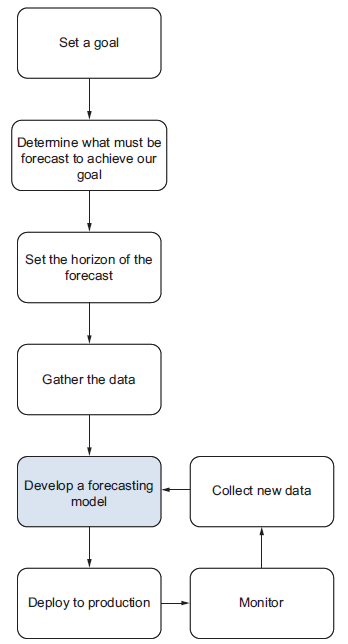

# <h1> Baseline Models </h1>

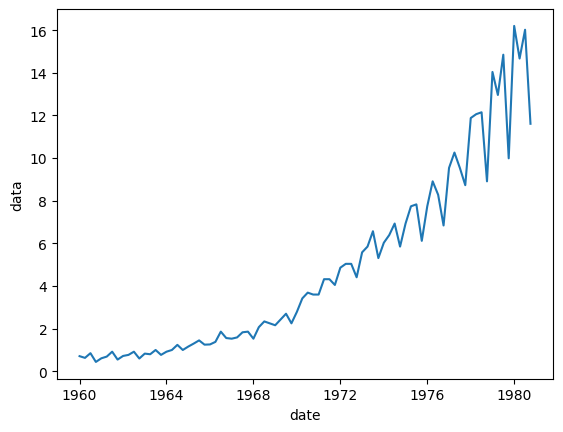

In [ ]:
## Using 1960 to 1979 quarterly EPS to predict 1980's 4 quarterly EPS ##

# Import data
df_jnj = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/JNJ.csv", parse_dates=['date'])

# Plot data
sns.lineplot(x=df_jnj['date'], y=df_jnj['data'])

# Spliting dataset into train & test sets
train = df_jnj.iloc[:-4,:]      # Use to develop model
test = df_jnj.iloc[-4:,:]       # Use to evaluate performance

<ipython-input-3-e955c9f7acbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'forecast'] = historical_mean


Text(0.5, 0, 'Year')

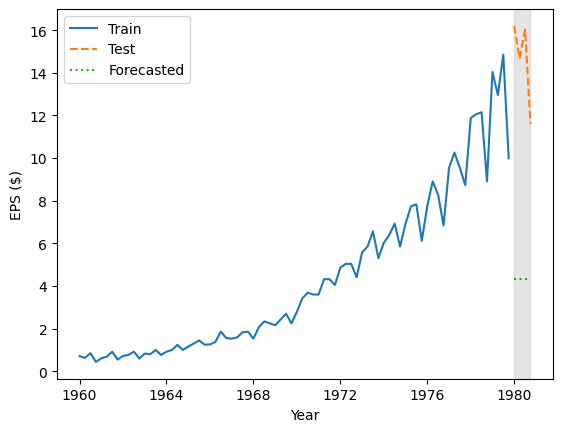

In [ ]:
## Historical arithmetic mean ##

# Forecasting using historical mean
historical_mean = np.mean(train['data'])
test.loc[:,'forecast'] = historical_mean

# Error metric: Mean absolute percentage error
def mape(y_actual, y_predicted):
    return np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

# Calculated MAPE is 70%: on average baseline deviates by 70% from the observed quarterly EPS
mape_historical_mean = mape(test['data'], test['forecast'])

# Plot forecasted data
fig, ax = plt.subplots()
sns.lineplot(x=train['date'], y=train['data'], ax=ax, label="Train")                                # Training data
sns.lineplot(x=test['date'], y=test['data'], linestyle='dashed', ax=ax, label="Test")               # Observed test data
sns.lineplot(x=test['date'], y=test['forecast'], linestyle='dotted', ax=ax, label="Forecasted")     # Forecasted data
plt.axvspan(test.iloc[0,0], test.iloc[-1,0], color="grey", alpha=0.2)                               # Shadowing
plt.ylabel("EPS ($)")
plt.xlabel("Year")

# Intuition from graph:
# 1. From training set, EPS has a positive trend -> EPS increasing at a increasing rate with time.
# 2. Forecasted data is very far below Test data, and has no trend.
# 3. Lesson: earlier values is not predictive of future values in long term because of the positive trend component in our dataset.
# 4. Taking the mean of a shorter and more recent period of time would help improve baseline model?

<ipython-input-4-19f0e438c090>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'forecast'] = last_year_mean


Text(0.5, 0, 'Year')

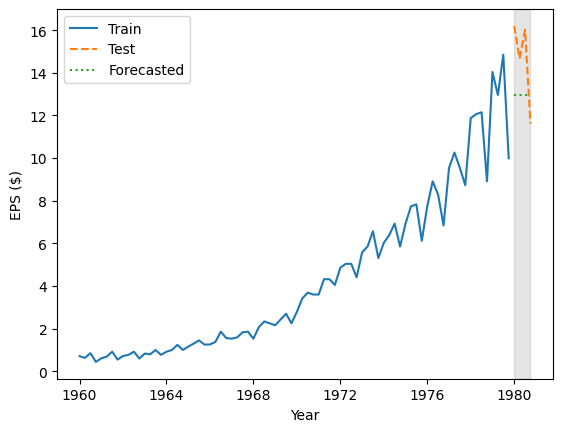

In [ ]:
## Most recent historical mean value ##

# Forecasting using the last year average value
last_year_mean = np.mean(train['data'][-4:])
test.loc[:,'forecast'] = last_year_mean

# Error metric: Mean absolute percentage error
def mape(y_actual, y_predicted):
    return np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

# Calculated MAPE is 15.6%: on average baseline deviates by 15.6% from the observed quarterly EPS
mape_recent_mean = mape(test['data'], test['forecast'])

# Plot forecasted data
fig, ax = plt.subplots()
sns.lineplot(x=train['date'], y=train['data'], ax=ax, label="Train")                                # Training data
sns.lineplot(x=test['date'], y=test['data'], linestyle='dashed', ax=ax, label="Test")               # Observed test data
sns.lineplot(x=test['date'], y=test['forecast'], linestyle='dotted', ax=ax, label="Forecasted")     # Forecasted data
plt.axvspan(test.iloc[0,0], test.iloc[-1,0], color="grey", alpha=0.2)                               # Shadowing
plt.ylabel("EPS ($)")
plt.xlabel("Year")

# Intuition from graphs:
# 1. Future values likely depend on past values not too far back in history -> a sign of autocorrelation.

<ipython-input-5-12cbc371f8d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'forecast'] = last_known_value


Text(0.5, 0, 'Year')

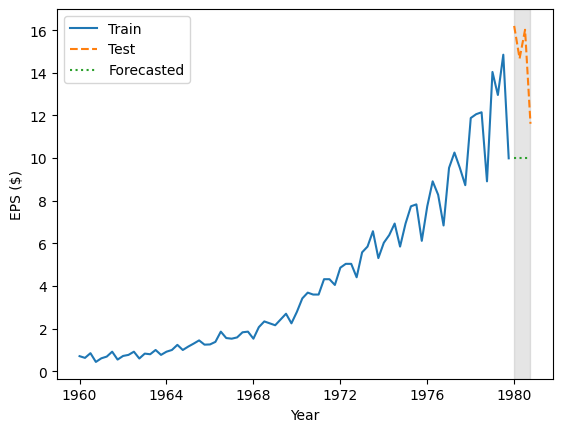

In [ ]:
## Last known historical value ##

# Forecasting using the last known value
last_known_value = train['data'].iloc[-1]
test.loc[:,'forecast'] = last_known_value

# Error metric: Mean absolute percentage error
def mape(y_actual, y_predicted):
    return np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

# Calculated MAPE is 30.45%: on average baseline deviates by 30.45% from the observed quarterly EPS
mape_recent_value = mape(test['data'], test['forecast'])

# Plot forecasted data
fig, ax = plt.subplots()
sns.lineplot(x=train['date'], y=train['data'], ax=ax, label="Train")                                # Training data
sns.lineplot(x=test['date'], y=test['data'], linestyle='dashed', ax=ax, label="Test")               # Observed test data
sns.lineplot(x=test['date'], y=test['forecast'], linestyle='dotted', ax=ax, label="Forecasted")     # Forecasted data
plt.axvspan(test.iloc[0,0], test.iloc[-1,0], color="grey", alpha=0.2)                               # Shadowing
plt.ylabel("EPS ($)")
plt.xlabel("Year")

# Intuition from graphs:
# 1. EPS displays cyclical behavior, high during the first 3 quarters and falls at last quarter
# 2. Using last known value does not take seasonality into account

<ipython-input-6-3eadd3cbac97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'forecast'] = train['data'][-4:].values


Text(0.5, 0, 'Year')

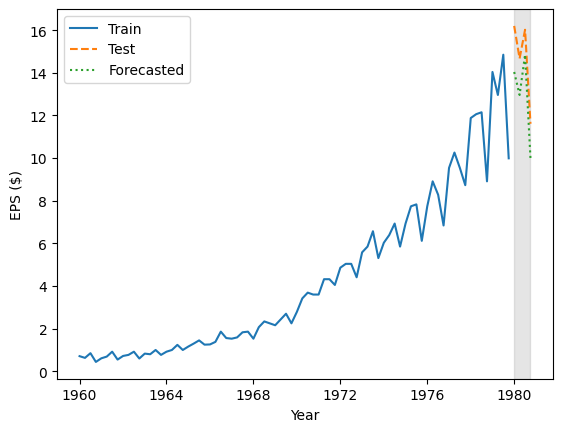

In [ ]:
## Naive seasonal forecast ##

# A full seasonal cycle ocurs in 4 quarters.
# Therefore, use 1979 Q1 as 1980 Q1, 1979 Q2 as 1980 Q2, etc..
test.loc[:,'forecast'] = train['data'][-4:].values

# Error metric: Mean absolute percentage error
def mape(y_actual, y_predicted):
    return np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

# Calculated MAPE is 11.56%: on average baseline deviates by 11.56% from the observed quarterly EPS
mape_naive_seasonal = mape(test['data'], test['forecast'])

# Plot forecasted data
fig, ax = plt.subplots()
sns.lineplot(x=train['date'], y=train['data'], ax=ax, label="Train")                                # Training data
sns.lineplot(x=test['date'], y=test['data'], linestyle='dashed', ax=ax, label="Test")               # Observed test data
sns.lineplot(x=test['date'], y=test['forecast'], linestyle='dotted', ax=ax, label="Forecasted")     # Forecasted data
plt.axvspan(test.iloc[0,0], test.iloc[-1,0], color="grey", alpha=0.2)                               # Shadowing
plt.ylabel("EPS ($)")
plt.xlabel("Year")

# Intuition from graphs:
# 1. Naive seasonal forecast resulted in the lowest MAPE -> seasonality has significant impact on future values

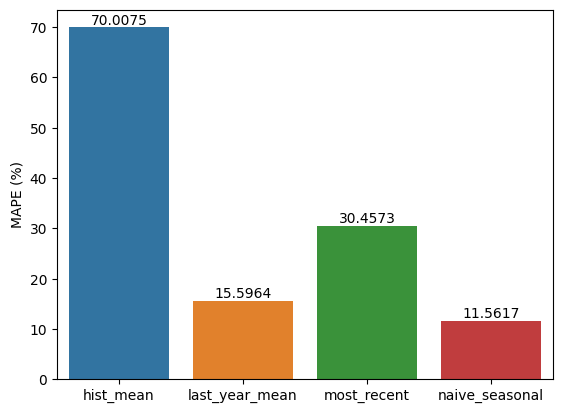

In [ ]:
## Selecting the best performing baseline model as benchmark ##

mape_data = {
    'name':['hist_mean', 'last_year_mean', 'most_recent', 'naive_seasonal'],
    'mape':[mape_historical_mean, mape_recent_mean, mape_recent_value, mape_naive_seasonal]
    }

_, ax = plt.subplots()
sns.barplot(data=mape_data, x='name', y='mape')
ax.bar_label(ax.containers[0])
plt.ylabel('MAPE (%)');

# Naive seasonal baseline model has lowest MAPE and therefore is the best performing.
# To compare MAPE from other models against naive seasonal MAPE.
# A complex model is better performing only if its MAPE is lower than 11.56%.

# Random Walk Model

$Y_t = C + Y_{t-1} + ϵ_t$

## Identifying random walk time series

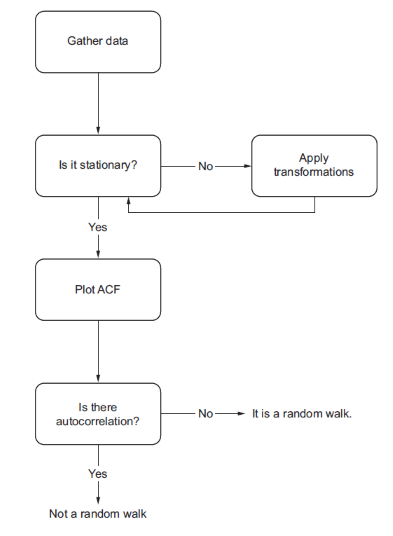

### Example using simulated data

<Axes: >

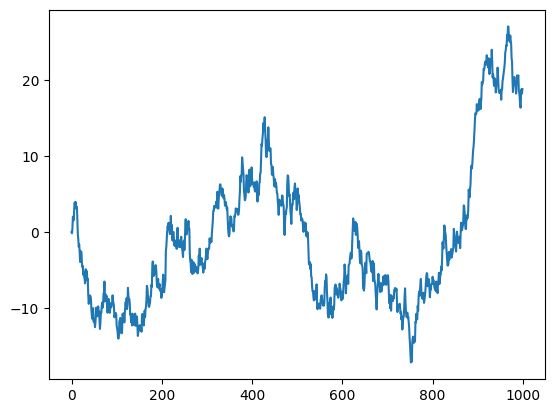

In [ ]:
## Simulate random walk ##
import numpy as np
import seaborn as sns

np.random.seed(42)

steps = np.random.normal(0, 1, 1000)
steps[0] = 0
random_walk = np.cumsum(steps)

sns.lineplot(random_walk)

# Intuition from graph:
# Obvious positive and negative trends in time series -> not stationary

ADF statistic: -0.965952487691875
Rejection region: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
p-value: 0.7654789696692581


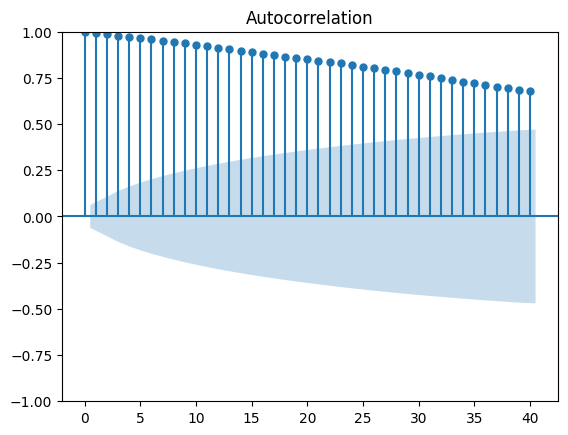

In [ ]:
## Testing for stationary and autocorrelation ##

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Augmented Dickey-Fuller test (testing for stationary)
ADF_result = adfuller(random_walk)
print(f'ADF statistic: {ADF_result[0]}')
print(f'Rejection region: {ADF_result[4]}')
print(f'p-value: {ADF_result[1]}')

# Results:
# p-value = 0.77 > 0.05
# ADF statistic = -0.97 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Plot ACF function (to identify autocorrelation)
plot_acf(random_walk, lags=40);

# Intuition from ACF graph:
# Autocorrelation coefficients decrease as lag increases -> autocorrelated & not stationary.
# Shaded area represents confidence interval,
# if point is within shaded area, then it is not significantly different from 0.

ADF statistic: -31.789310857560594
Rejection region: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}
p-value: 0.0


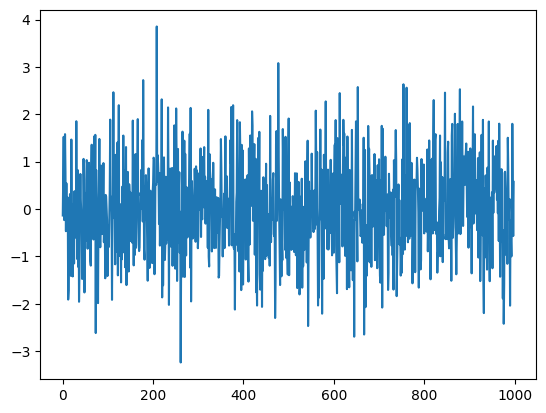

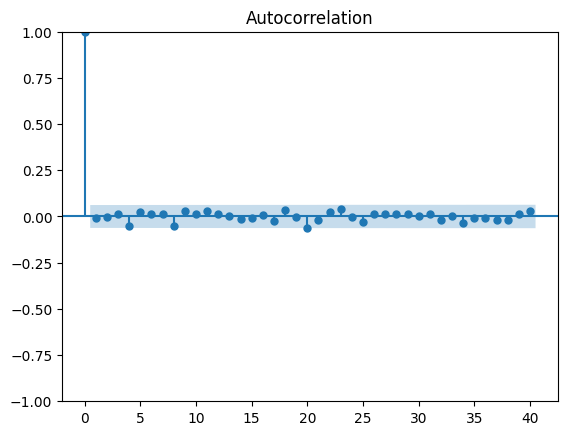

In [ ]:
## Transforming non-stationary data ##

# Applying first order differencing
diff_random_walk = np.diff(random_walk, n=1)
sns.lineplot(diff_random_walk)

# Intuition from differenced data graph:
# 1. No trends in series
# 2. Variance seems stable

# Testing for stationary again (using ADF test)
ADF_result_new = adfuller(diff_random_walk)
print(f'ADF statistic: {ADF_result_new[0]}')
print(f'Rejection region: {ADF_result_new[4]}')
print(f'p-value: {ADF_result_new[1]}')

# Results:
# p-value = 0.0 < 0.05
# ADF statistic = -31.79 < rejection zone (lies inside)
# Reject null hypothesis, conclude time series is stationary.

# Plot new ACF function (to identify autocorrelation)
plot_acf(diff_random_walk, lags=40);

# Intuition from ACF graph:
# No significant autocorrelation coefficients after lag 0
# Stationary process is completely random and uncorrelated (no relation between values)

### Example using GOOGL

<Axes: xlabel='Date', ylabel='Close'>

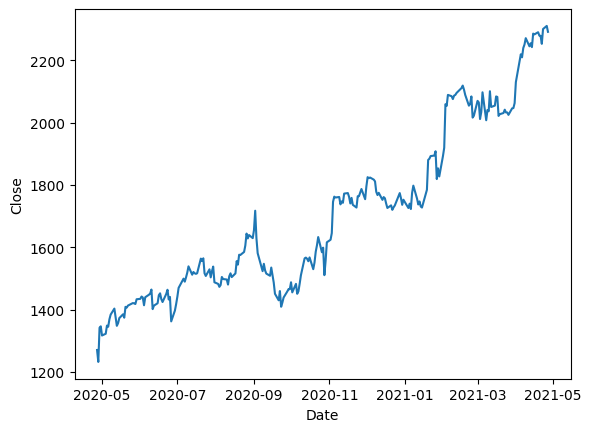

In [ ]:
## Using 27/4/2020 to 27/4/2021 closing stock price data to predict future GOOGL stock price ##

# Import data
df_google = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/GOOGL.csv", parse_dates=['Date'])

# Plot data
sns.lineplot(x=df_google['Date'], y=df_google['Close'])

# Intuition from graph:
# Obvious positive trends -> not stationary

In [ ]:
# Testing for stationary
ADF_result = adfuller(df_google['Close'])
ADF_result

# Results:
# p-value = 0.97 > 0.05
# ADF statistic = 0.16 > rejection zone (lies outside)
# Do not reject null hypothesis, conclude time series is not stationary.

(0.16025048664771302,
 0.9699419435913057,
 8,
 244,
 {'1%': -3.457437824930831,
  '5%': -2.873459364726563,
  '10%': -2.573122099570008},
 2292.5903585999613)

In [ ]:
# Apply 1st order differencing
diff_close = np.diff(df_google['Close'], n=1)

# Testing for stationary again
ADF_result = adfuller(diff_close)
ADF_result

# Results:
# p-value = 0.000005 < 0.05
# ADF statistic = -5.3 < rejection zone (lies inside)
# Reject null hypothesis, conclude differenced data is stationary.

(-5.303439704295234,
 5.3865309614545585e-06,
 7,
 244,
 {'1%': -3.457437824930831,
  '5%': -2.873459364726563,
  '10%': -2.573122099570008},
 2281.5968988816794)

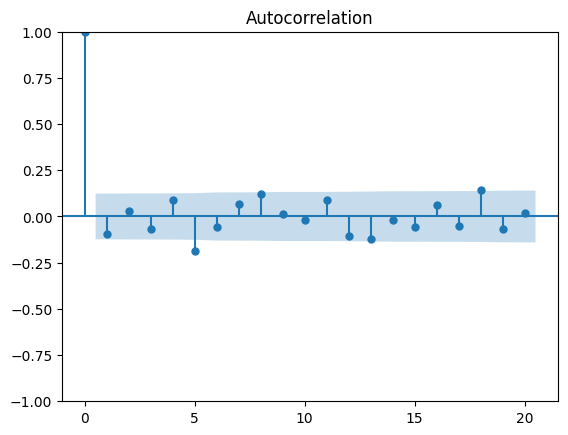

In [ ]:
# Identifying autocorrelation
plot_acf(diff_close, lags=20);

# Intuition from graph:
# No significant coefficients except at lags 5 and 18
# Since no consecutive significant coefficients, can conclude these correlations happened by chance
# Can safely assume that coefficients at lags 5 and 18 are not significant
# Therefore, differenced data shows no autocorrelation

## Predicting Random Walk time series

### Forecasting a long horizon

In [ ]:
## Simulate random walk ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

steps = np.random.normal(0, 1, 1000)
steps[0] = 0
random_walk = np.cumsum(steps)

# Spliting dataset into train & test sets
df_random_walk_train = pd.DataFrame(random_walk[:800], columns=['value'])
df_random_walk_test = pd.DataFrame(random_walk[800:], columns=['value'])

In [ ]:
## Naive forecasting methods ##

# Forecasting using historical mean
random_walk_mean = np.mean(df_random_walk_train['value'])
df_random_walk_test.loc[:,'pred_mean'] = random_walk_mean

# Forecasting using the last known value
random_walk_last = df_random_walk_train.iloc[-1,:].value
df_random_walk_test.loc[:,'pred_last'] = random_walk_last

# Forecasting using drift method
deltaY = df_random_walk_train.iloc[-1].value - df_random_walk_train.iloc[0].value
deltaX = df_random_walk_train.count().value - 1
drift = deltaY / deltaX     # drift = -0.0085 -> forecasted value decreases overtime

# forecast = drift * timestep + initial_value
x_value = np.arange(800, 1000, 1)
random_walk_drift = drift * x_value
df_random_walk_test.loc[:,'pred_drift'] = random_walk_drift

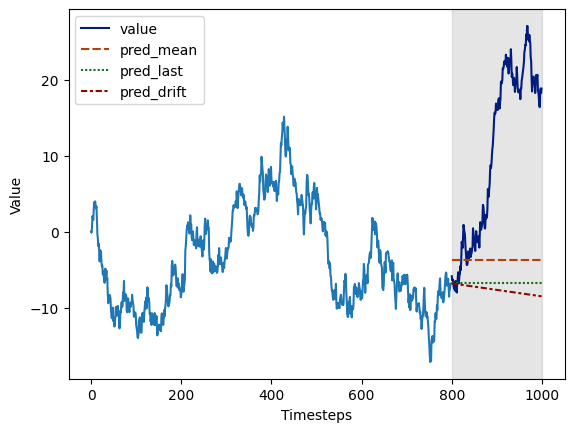

In [ ]:
## Assessing prediction models ##

# Plot dataset
df_random_walk_test = df_random_walk_test.set_index(np.arange(800, 1000, 1))

fig, ax = plt.subplots()
sns.lineplot(df_random_walk_train, ax=ax, legend=False)
sns.lineplot(df_random_walk_test, ax=ax, palette='dark')
plt.axvspan(800, 1000, color='grey', alpha=0.2)
plt.xlabel('Timesteps')
plt.ylabel('Value')

# Intuition from graph:
# All predictions are fairly poor and fail to predict the sudden increase observed in test set.

# Calculate mean squred error
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(df_random_walk_test['value'],df_random_walk_test['pred_mean'])
mse_last = mean_squared_error(df_random_walk_test['value'],df_random_walk_test['pred_last'])
mse_drift = mean_squared_error(df_random_walk_test['value'],df_random_walk_test['pred_drift'])

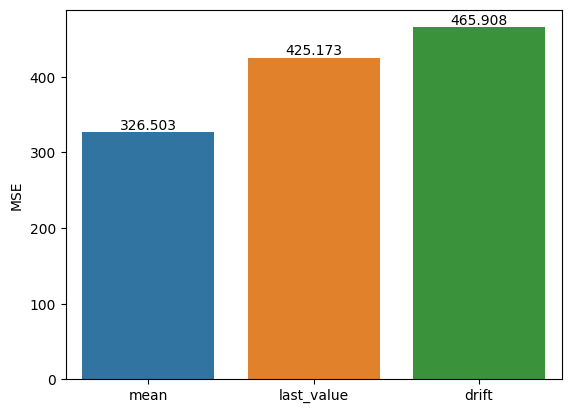

In [ ]:
# Plot MSEs
mse_data = {
    'name':['mean', 'last_value', 'drift'],
    'mse':[mse_mean, mse_last, mse_drift]
    }

_, ax = plt.subplots()
sns.barplot(data=mse_data, x='name', y='mse')
ax.bar_label(ax.containers[0])
plt.ylabel('MSE');

# Intuition:
# Best performing MSE exceeds 300,
# very high error considering that actual values are between 30 and -20.

### Forecasting next timestep

0.9256876651440581


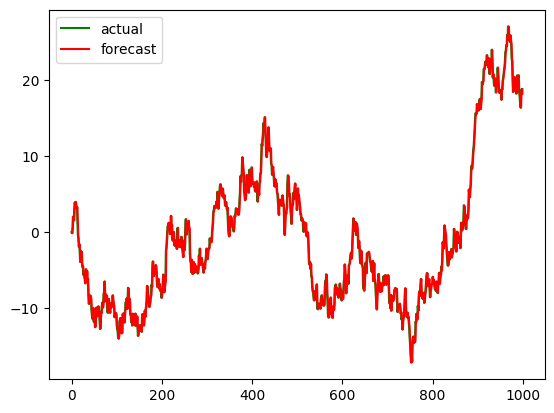

In [ ]:
## Predicting last known value at each timestep ##
from sklearn.metrics import mean_squared_error

df_next_timestep = pd.DataFrame(random_walk, columns=['actual'])
df_next_timestep['forecast'] = df_next_timestep['actual'].shift(periods=1)

# Plot graph
df_next_timestep.plot(color=['g','r'])

# Calculate MSE on test set
mse_one_step = mean_squared_error(df_next_timestep.loc[800: ,'actual'], df_next_timestep.loc[800: ,'forecast'])
print(mse_one_step)

# If a random walk process must be forecast, it is better to make
# many short term forecasts using naive forecasting methods.

# Moving Average Model

## Identifying moving average process

MA(q):&ensp;$Y_t = μ + ϵ_t + θ_1ϵ_{t-1} + θ_2ϵ_{t-2} +...+ θ_qϵ_{t-q} $

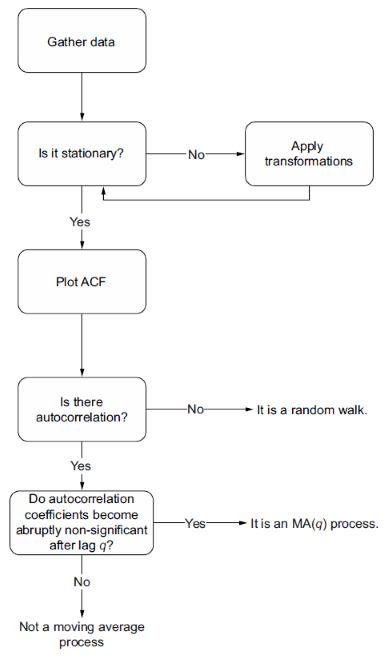

ADF_null: (-1.5121662069359048, 0.5274845352272605, 3, 496, {'1%': -3.4436029548776395, '5%': -2.867384756137026, '10%': -2.5698830308597813}, 1354.8017397952053)
ADF_1_diff: (-10.576657780341959, 7.076922818587193e-19, 2, 496, {'1%': -3.4436029548776395, '5%': -2.867384756137026, '10%': -2.5698830308597813}, 1350.640860630276)


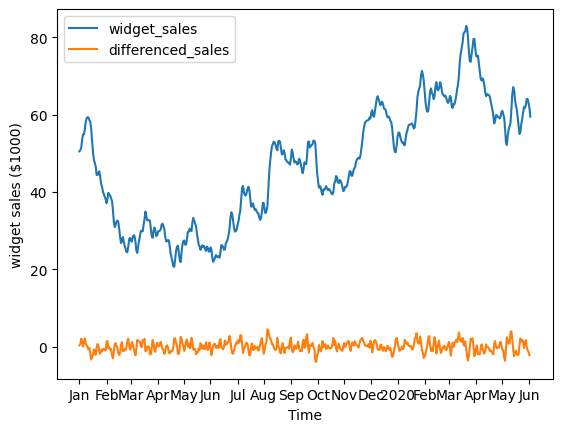

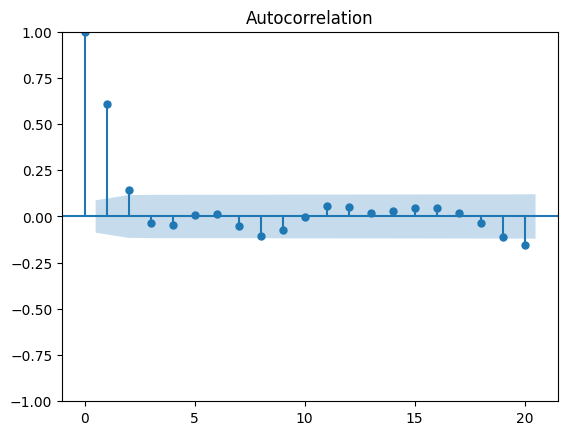

In [ ]:
## Forecasting future sales ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as am
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Import data
df_sales = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/widget_sales.csv")

# Plot data
sns.lineplot(df_sales)
plt.xticks([0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
            '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.xlabel('Time')
plt.ylabel('widget sales ($1000)')

# Intuition from graph:
# Exhibits long-term trend with peaks and troughs

# Test for stationary
ADF_result = adfuller(df_sales['widget_sales'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 0.53 > 0.05
# ADF statistic = -1.51 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
widget_sales_diff = np.diff(df_sales['widget_sales'], n=1)

# Plot differenced data
sns.lineplot(widget_sales_diff, label='differenced_sales')

# Test for stationary again
ADF_diff_result = adfuller(widget_sales_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 7e^-19 < 0.05
# ADF statistic = -10.58 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

# Plot ACF function (to identify autocorrelation & order of MA process)
plot_acf(widget_sales_diff, lags=20);

# Intuition from ACF graph:
# Significant autocorrelation coefficients up till lag 2, then suddenly become non-significant.
# Second-order moving average model for forecasting

## Predicting moving average process

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Spliting dataset into train & test sets
df_diff = pd.DataFrame(widget_sales_diff)
df_train = df_diff.iloc[:int(len(widget_sales_diff) * .9)]
df_test = df_diff.iloc[int(len(widget_sales_diff) * .9):]

# To execute rolling forecasts
def rolling_forecast(df: pd.DataFrame,
                     train_len: int,
                     test_len: int,
                     window: int,
                     method: str) -> list:

    total_len = train_len + test_len

    # As time series increases by window period, new mean is calculated
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = df.iloc[:train_len,].mean()
            pred_mean.extend(mean.to_list() * window)
        return pred_mean

    # As time series increases by window period, new last value is extracted
    elif method == 'last':
        pred_last = []
        for i in range(train_len, total_len, window):
            last_value = df.iloc[i-1,]
            pred_last.extend(last_value.to_list() * window)
        return pred_last

    # As time series increases by window period, new MA is calculated
    elif method == 'MA':
        pred_ma = []
        for i in range(train_len, total_len, window):
            ma_model = SARIMAX(df.iloc[:i,], order=(0, 0, window))
            res = ma_model.fit(disp=False)
            predictions = res.get_prediction(0, i + window -1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ma.extend(oos_pred)
        return pred_ma


# Forecasting using historical mean, last value, and MA(2)
TRAIN_LEN = len(df_train)
TEST_LEN = len(df_test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'mean')
pred_last = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'last')
pred_ma = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'MA')

df_pred = pd.DataFrame({'pred_mean' : pred_mean, 'pred_last' : pred_last,
                        'pred_MA' : pred_ma}).set_index(np.arange(449, 499), drop=True)
df_pred['actual'] = df_test

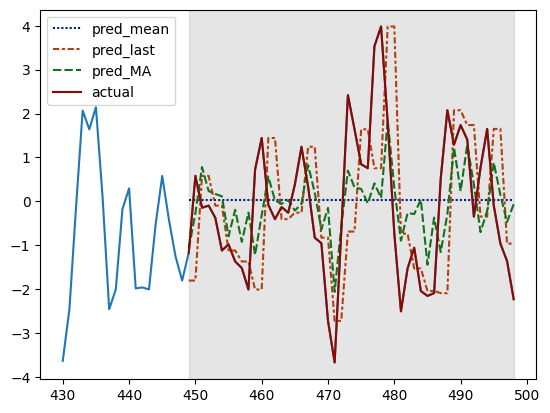

In [ ]:
## Assessing prediction models ##
from sklearn.metrics import mean_squared_error

# Visualising forecasts
sns.lineplot(df_diff.iloc[430:,], legend=False)
sns.lineplot(df_pred, palette='dark', style_order=['actual', 'pred_MA', 'pred_mean', 'pred_last'])
plt.legend(loc=2)
plt.axvspan(449, 498, color='grey', alpha=0.2)

# Calculating MSE
mse_mean = mean_squared_error(df_pred['actual'], df_pred['pred_mean'])
mse_last = mean_squared_error(df_pred['actual'], df_pred['pred_last'])
mse_MA = mean_squared_error(df_pred['actual'], df_pred['pred_MA'])

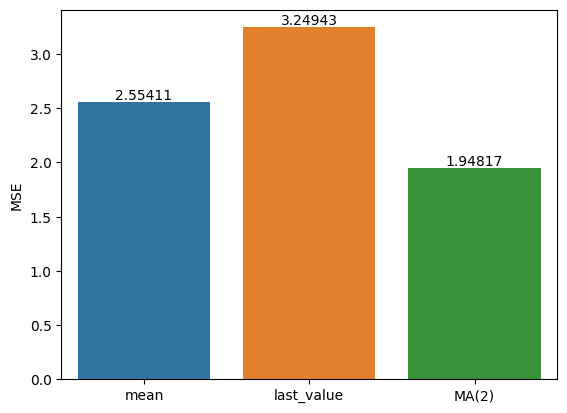

In [ ]:
# Plot MSEs
mse_data = {
    'name':['mean', 'last_value', 'MA(2)'],
    'mse':[mse_mean, mse_last, mse_MA]
    }

_, ax = plt.subplots()
sns.barplot(data=mse_data, x='name', y='mse')
ax.bar_label(ax.containers[0])
plt.ylabel('MSE');

# Intuition:
# MA(2) is the best performing model with lowest MSE

2.7656641101118606


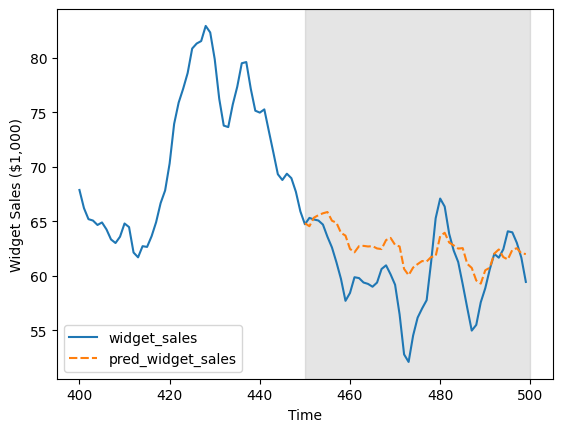

In [ ]:
# Inverse-transform the forecasted differenced dataset to original scale
df_sales.loc[450:,'pred_widget_sales'] = df_sales.loc[449,'widget_sales'] + pd.DataFrame(pred_ma, index=np.arange(450,500))[0].cumsum()

# For diff values:
# 0 to 448 -> train set
# 449 to 498 -> test set
# Use first value's index of (diff) test set (don't touch train set) as initial Y_0 value index for inverse-transforming
# Then perform a cumulative sum

## Assessing prediction models ##

# Plot MA(2) sales forecast
sns.lineplot(df_sales.iloc[400:,])
plt.axvspan(450, 500, color='grey', alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Widget Sales ($1,000)')

# Intuition from forecast graph:
# MA(2) graph follows general trend of observed values, but don't predict bigger troughs and peaks

# Calculating MAE
# Reporting values and errors in original scale of data to make sense from business perspective
from sklearn.metrics import mean_absolute_error
mae_MA_undiff = mean_absolute_error(df_sales.loc[450:, 'widget_sales'], df_sales.loc[450:, 'pred_widget_sales'])
print(mae_MA_undiff)

# Results:
# Mean absolute error = 2.77
# Our predictions are on average $2,770 above or below the actual value

# Autoregressive Model

AR(p):&ensp;$Y_t=C+\phi_1Y_{t-1}+\phi_2Y_{t-2}+...+\phi_pY_{t-p}+ϵ_t$

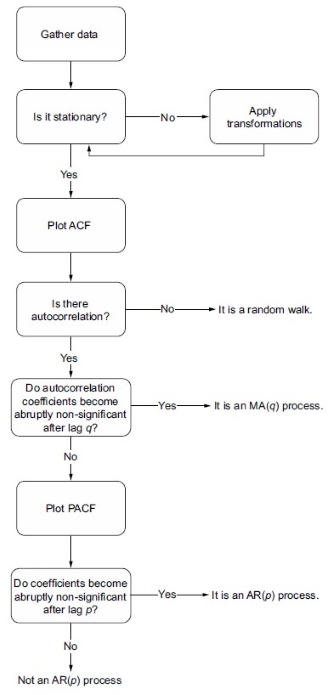

## Identifying autoregressive process

ADF_null: (-1.1758885999240747, 0.683880891789619, 3, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 2740.300875453594)
ADF_1_diff: (-5.268231347422044, 6.369317654781239e-06, 2, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 2735.535696297212)


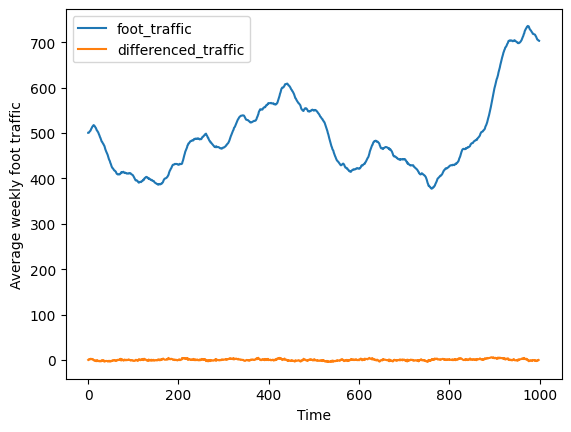

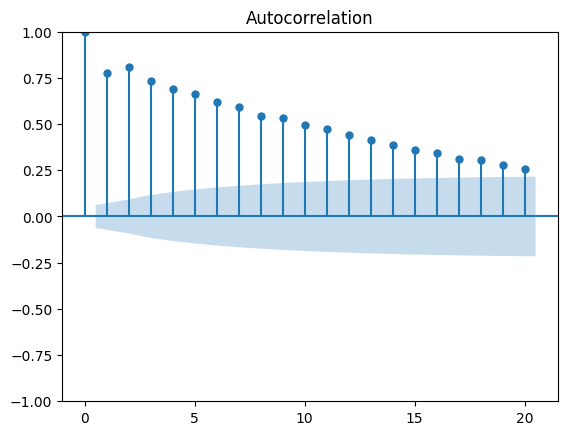

In [ ]:
## Forecasting next week's average weekly foot traffic ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as am
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Import data
df_traffic = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/foot_traffic.csv")

# Plot data
sns.lineplot(df_traffic)
plt.xlabel('Time')
plt.ylabel('Average weekly foot traffic')

# Intuition from graph:
# Exhibits long-term trend with peaks and troughs -> non-stationary process
# No apparent cyclical pattern -> no seasonal effects

# Test for stationary
ADF_result = adfuller(df_traffic['foot_traffic'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 0.68 > 0.05
# ADF statistic = -1.18 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
traffic_diff = np.diff(df_traffic['foot_traffic'], n=1)

# Plot differenced data
sns.lineplot(traffic_diff, label='differenced_traffic')

# Test for stationary again
ADF_diff_result = adfuller(traffic_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 6e^-6 < 0.05
# ADF statistic = -5.27 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

# Plot ACF function (to identify autocorrelation)
plot_acf(traffic_diff, lags=20);

# Intuition from ACF graph:
# Significant autocorrelation coefficients beyond lag 0 -> not random walk process
# Autocorrelation coefficients decay exponentially as lag increases -> autoregressive process

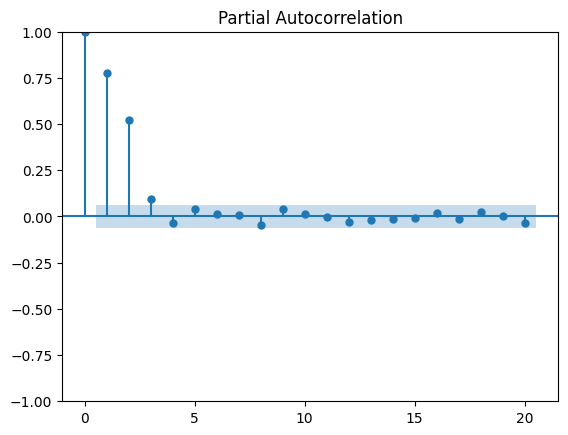

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Identify order of stationary AR(p) process (using partical autocorrelation function)
plot_pacf(traffic_diff, lags=20);

# Intuition from PACF graph:
# No significant coefficients after lag 3 -> AR(3)

## Predicting autoregressive process

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Spliting dataset into train & test sets
df_diff = pd.DataFrame(traffic_diff, columns=['traffic_diff'])
df_train = df_diff.loc[:df_diff.size-57-1,]
df_test = df_diff.loc[df_diff.size-57:,:]
# Allocating last 57 rows as test set because need divisible by order (3)

# To execute rolling forecasts
def rolling_forecast(df: pd.DataFrame,
                     train_len: int,
                     test_len: int,
                     window: int,
                     method: str) -> list:

    total_len = train_len + test_len

    # As time series increases by window period, new mean is calculated
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = df.iloc[:train_len,].mean()
            pred_mean.extend(mean.to_list() * window)
        return pred_mean

    # As time series increases by window period, new last value is extracted
    elif method == 'last':
        pred_last = []
        for i in range(train_len, total_len, window):
            last_value = df.iloc[i-1,]
            pred_last.extend(last_value.to_list() * window)
        return pred_last

    # As time series increases by window period, new MA is calculated
    elif method == 'AR':
        pred_ar = []
        for i in range(train_len, total_len, window):
            ar_model = SARIMAX(df.iloc[:i,], order=(window, 0, 0))
            res = ar_model.fit(disp=False)
            predictions = res.get_prediction(0, i + window -1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ar.extend(oos_pred)
        return pred_ar

# Forecasting using historical mean, last value, and AR(3)
TRAIN_LEN = len(df_train)
TEST_LEN = len(df_test)
WINDOW = 3

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'mean')
pred_last = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'last')
pred_ar = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'AR')

df_pred = pd.DataFrame({'pred_mean' : pred_mean, 'pred_last' : pred_last,
                        'pred_AR' : pred_ar}).set_index([np.arange(df_diff.size-57, df_diff.size, 1)], drop=True)

df_pred['actual'] = df_test

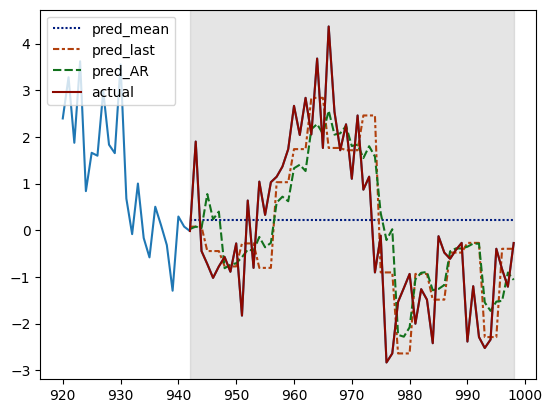

In [ ]:
## Assessing prediction models ##
from sklearn.metrics import mean_squared_error

# Visualising forecasts
sns.lineplot(df_diff.iloc[920:,], legend=False)
sns.lineplot(df_pred, palette='dark', style_order=['actual', 'pred_AR', 'pred_mean', 'pred_last'])
plt.legend(loc=2)
plt.axvspan(942, 998, color='grey', alpha=0.2)

# Calculating MSE
mse_mean = mean_squared_error(df_pred['actual'], df_pred['pred_mean'])
mse_last = mean_squared_error(df_pred['actual'], df_pred['pred_last'])
mse_AR = mean_squared_error(df_pred['actual'], df_pred['pred_AR'])

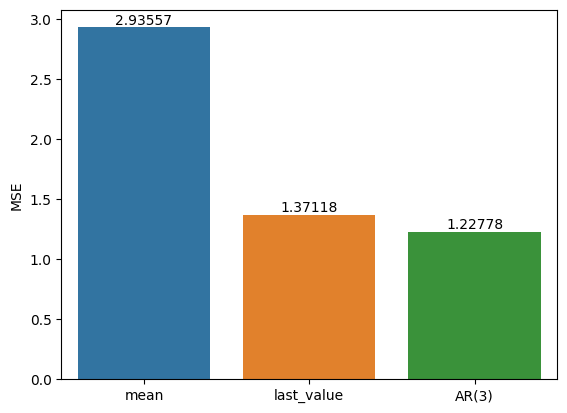

In [ ]:
# Plot MSEs
mse_data = {
    'name':['mean', 'last_value', 'AR(3)'],
    'mse':[mse_mean, mse_last, mse_AR]
    }

_, ax = plt.subplots()
sns.barplot(data=mse_data, x='name', y='mse')
ax.bar_label(ax.containers[0])
plt.ylabel('MSE');

# Intuition:
# AR(3) is the best performing model with lowest MSE

3.4476440167647002


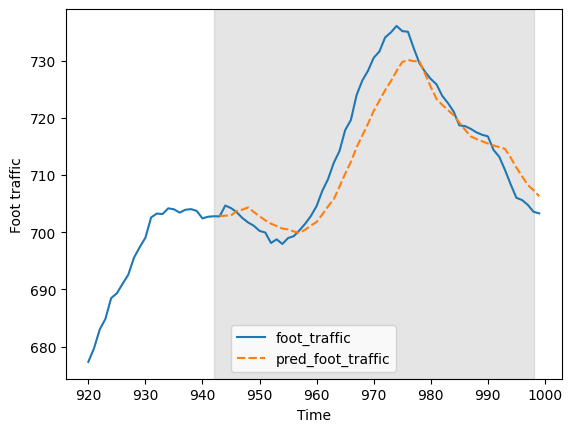

In [ ]:
# Inverse-transform the forecasted differenced dataset to original scale
df_traffic.loc[(df_train.size+1):(df_train.size + df_test.size),'pred_foot_traffic'] = df_traffic.loc[942,'foot_traffic'] + np.cumsum(pred_ar)  # Note: pred_foot_traffic row 942 is NaN (since value is not forecasted)

# For diff data:
# 0 to 941 -> train set
# 942 to 998 -> test set
# Use first value's index of (diff) test set as initial Y_0 value index for inverse-transforming
# Then perform a cumulative sum

## Assessing prediction models ##

# Plot AR(3) sales forecast
sns.lineplot(df_traffic.iloc[920:,])
plt.axvspan(942, 998, color='grey', alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Foot traffic')

# Intuition from forecast graph:
# AR(3) graph follows general trend of observed values, but don't predict bigger troughs and peaks

# Calculating MAE
# Reporting values and errors in original scale of data to make sense from business perspective
from sklearn.metrics import mean_absolute_error
mae_MA_undiff = mean_absolute_error(df_traffic.loc[df_traffic.pred_foot_traffic.notna(), 'foot_traffic'], df_traffic.loc[df_traffic.pred_foot_traffic.notna(), 'pred_foot_traffic'])
print(mae_MA_undiff)

# Results:
# Mean absolute error = 3.45
# Our predictions are on average 3.45 person above/below the actual value for week's foot traffic

# Autoregressive Moving Average Model

ARMA(p,q):&ensp;$Y_t=C+\phi_1Y_{t-1}+\phi_2Y_{t-2}+...+\phi_pY_{t-p}+μ+ϵ_t+θ_1ϵ_{t-1}+θ_2ϵ_{t-2}+...+θ_qϵ_{t-q}$

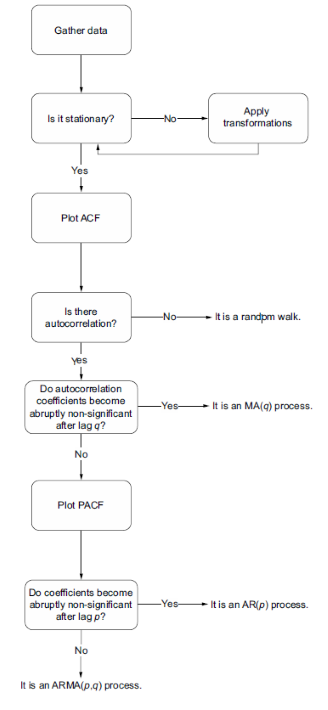

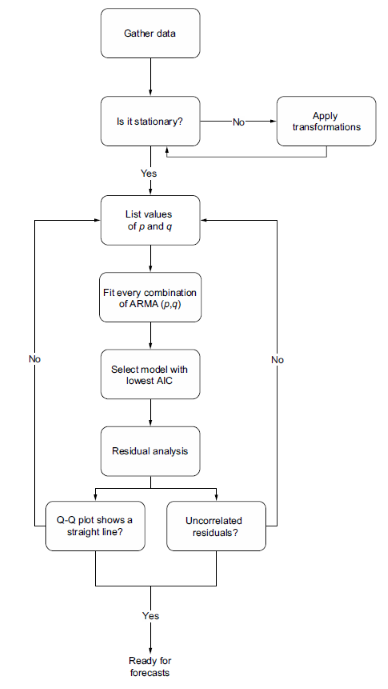

## Identifying ARMA process

### Example using simulated data

ADF: (-6.429878682042695, 1.707846668009654e-08, 20, 979, {'1%': -3.4370471695043037, '5%': -2.8644967585264784, '10%': -2.5683443301882956}, 2760.1171729466205)


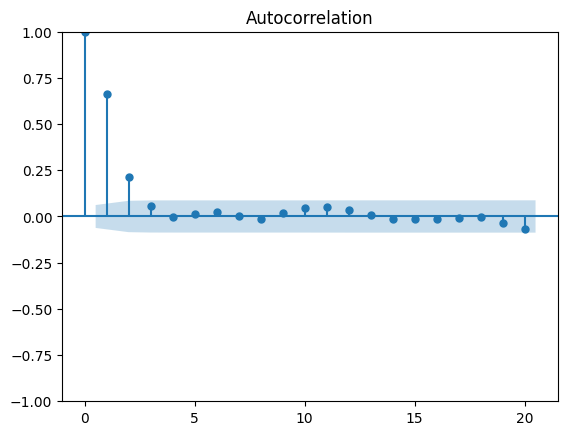

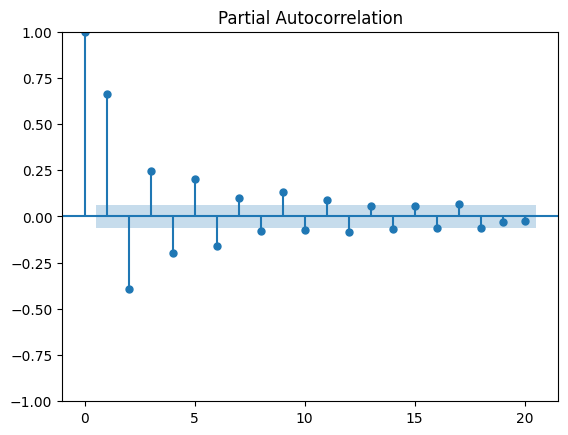

In [ ]:
## Simulate an ARMA(1,1) process ##
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
import pandas as pd

np.random.seed(42)

# Simulating ARMA(1,1) process: Y_t = 0.33y_{t-1} + 0.9ε_{t-1} + ε_t
ma1 = np.array([1, 0.9])
ar1 = np.array([1, -0.33])
ARMA_1_1_process = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)
# ma parameters: [1st autocorrelation coefficient in ACF, coefficients of MA process]
# ar parameters: [1st autocorrelation coefficient in ACF, negative of coefficients of AR process]

# Test for stationary
ADF_result = adfuller(ARMA_1_1_process)
print("ADF:", ADF_result)

# Results:
# p-value = 1.7e^-8 < 0.05
# ADF statistic = -6.43 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

# Plot ACF
plot_acf(ARMA_1_1_process, lags=20)

# Intuition from ACF graph:
# 1. Sinusoidal pattern -> presence of autoregressive process
# 2. Last significant coefficient is at lag 2 -> ACF do not reveal useful info about order q in ARMA

# Plot PACF
plot_pacf(ARMA_1_1_process, lags=20);

# Intuition from PACF graph:
# 1. Sinusoidal pattern -> Cannot infer value for the order p in ARMA

# No clear cutoff between significant and non-significant coefficients in both ACF and PACF plots
# Conclude that we have an ARMA(p,q) process

In [ ]:
## Determining the order p and q for ARMA(1,1) process ##
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.gofplots import qqplot

# Defining posssible values of p & q (0 to 3)
order_list = list(product(range(4), repeat=2))

# Fitting data to all unique ARMA(p,q) models
def optimise_ARMA(endog, order_list) -> pd.DataFrame:
    """
    Args:
        endog: data to be fitted
        order_list: list containing the (p,q) orders in tuples

    Returns: DataFrame containing AIC results for different (p,q) orders
    """
    results = []

    for p, q in order_list:
            model = SARIMAX(endog, order=(p, 0, q)).fit()
            aic = model.aic
            results.append([(p,q), aic])

    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

    return result_df

# Using Akaike information criterion to select optimal model
AIC_result = optimise_ARMA(ARMA_1_1_process, order_list)
AIC_result

# Intuition:
# ARMA(1,1) has lowest AIC and is best model relative to other fitted models

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2806.162939
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


,lb_stat,lb_pvalue
1,0.030706,0.860897
2,0.528021,0.767966
3,0.540904,0.909817
4,2.079774,0.721089
5,2.271897,0.810385
6,2.896262,0.821750
7,2.900378,0.894063
8,4.418799,0.817501
9,4.787567,0.852419
10,5.246805,0.874093


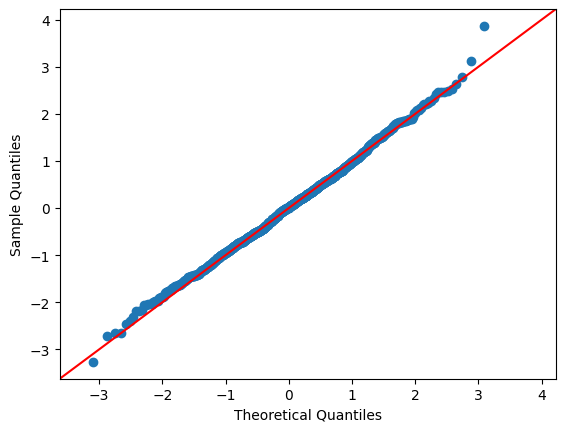

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Qualitative residual analysis - QQ plot (model's residuals normally distributed?)
model = SARIMAX(ARMA_1_1_process, order=(1, 0, 1))
model_fit = model.fit()
residuals = model_fit.resid
qqplot(residuals, line='45');

# Intuition from QQ plot:
# straight line approximately lies on y=x -> residuals seem to be normally distributed

# Quantitative residual analysis - Ljung-Box test (model's residuals are uncorrelated?)
acorr_ljungbox(residuals, 10)       # Apply Ljung-Box test on residuals for 10 lags

# Intuition from Ljung-Box test:
# H0: residuals are iid, no autocorrelation
# All p-value > 0.05, cannot reject null hypothesis at each lag
# Conclude that residuals are iid and uncorrelated

# Residuals are completely random -> ARAM(1,1) model fits our data well

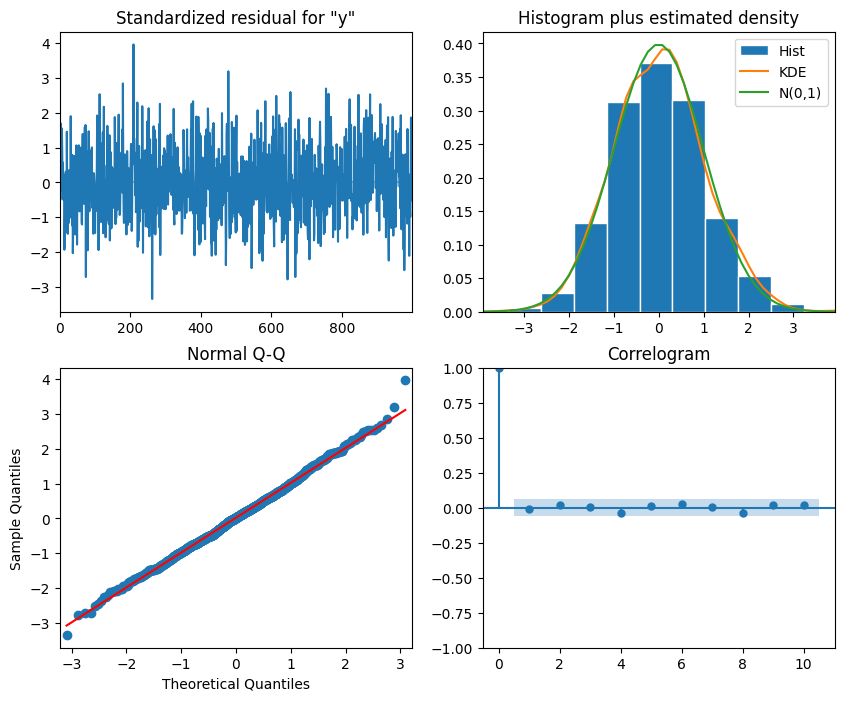

In [ ]:
## More qualitative residual analysis ##
model_fit.plot_diagnostics(figsize=(10, 8));

# Intuition:
# top left: no trend in residual, mean seems stable over time -> stationary
# top right: symmetrical distribution & mean=0 -> residuals are normally distributed
# bottom left: y=x -> residuals seem to be normally distributed
# bottom right: No significant coefficient beyond lag 0 -> no autocorrelation
# Properties of white noice: normally distributed, stationary, uncorrelated

### Example using actual data

ADF_null: (-0.8714653199452735, 0.7972240255014551, 6, 9993, {'1%': -3.431004556246501, '5%': -2.8618292749021865, '10%': -2.5669239758928017}, 28347.577478302363)
ADF_1_diff: (-20.694853863789017, 0.0, 5, 9993, {'1%': -3.431004556246501, '5%': -2.8618292749021865, '10%': -2.5669239758928017}, 28344.57207305265)


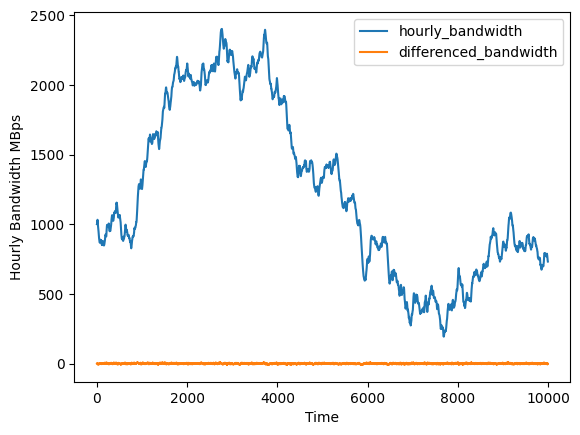

In [ ]:
## Forecasting hourly bandwidth usage for next two hours over 7 days ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Import data
df_bandwidth = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/bandwidth.csv")

# Plot data
sns.lineplot(df_bandwidth)
plt.xlabel('Time')
plt.ylabel('Hourly Bandwidth MBps')

# Intuition from graph:
# Exhibits long-term trend with peaks and troughs -> non-stationary process
# No apparent cyclical pattern -> no seasonal effects

# Test for stationary
ADF_result = adfuller(df_bandwidth['hourly_bandwidth'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 0.80 > 0.05
# ADF statistic = -0.87 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
hourly_bandwidth_diff = np.diff(df_bandwidth['hourly_bandwidth'], n=1)

# Plot differenced data
sns.lineplot(hourly_bandwidth_diff, label='differenced_bandwidth')

# Test for stationary again
ADF_diff_result = adfuller(hourly_bandwidth_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 0 < 0.05
# ADF statistic = -20.69 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

In [ ]:
## Determining the order p and q for ARMA process ##
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.gofplots import qqplot

# Spliting dataset into train & test sets
train = hourly_bandwidth_diff[:-168]
test = hourly_bandwidth_diff[-168:]

# Defining posssible values of p & q (0 to 3)
order_list = list(product(range(4), repeat=2))

# Fitting data to all unique ARMA(p,q) models
def optimise_ARMA(endog: list, order_list: list) -> pd.DataFrame:
    """
    Args:
        endog: data to be fitted
        order_list: list containing the (p,q) orders in tuples

    Returns: DataFrame containing AIC results for different (p,q) orders
    """
    results = []

    for p, q in order_list:
            model = SARIMAX(endog, order=(p, 0, q)).fit()
            aic = model.aic
            results.append([(p,q), aic])

    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

    return result_df

# Using Akaike information criterion to select optimal model
AIC_result = optimise_ARMA(train, order_list)
AIC_result

# Intuition:
# ARMA(3,2), ARMA(2,3) & ARMA(2,2) have very similar AIC value
# Select ARMA(2,2) as optimal model since it is less complex and has 4 parameters instead of 5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


,lb_stat,lb_pvalue
1,0.042190,0.837257
2,0.418364,0.811247
3,0.520271,0.914416
4,0.850554,0.931545
5,0.850841,0.973678
6,1.111754,0.981019
7,2.124864,0.952607
8,3.230558,0.919067
9,3.248662,0.953615
10,3.588289,0.964015


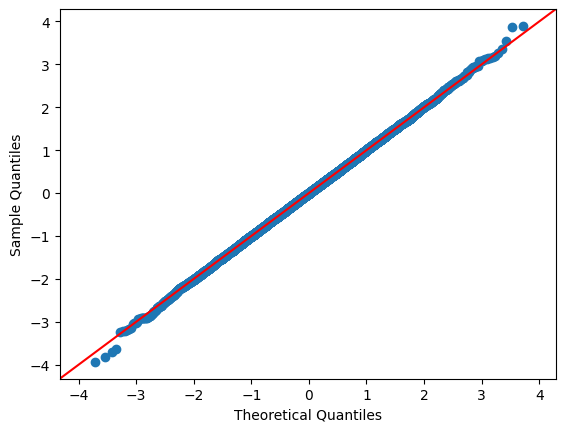

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Qualitative residual analysis - QQ plot (model's residuals normally distributed?)
model = SARIMAX(train, order=(2, 0, 2))
model_fit = model.fit()
residuals = model_fit.resid
qqplot(residuals, line='45');

# Intuition from QQ plot:
# straight line approximately lies on y=x -> residuals seem to be normally distributed

# Quantitative residual analysis - Ljung-Box test (model's residuals are uncorrelated?)
acorr_ljungbox(residuals, 10)       # Apply Ljung-Box test on residuals for 10 lags

# Intuition from Ljung-Box test:
# H0: residuals are iid, no autocorrelation
# All p-value > 0.05, cannot reject null hypothesis at each lag
# Conclude that residuals are iid and uncorrelated

# Residuals are completely random -> ARAM(2,2) model fits our data well

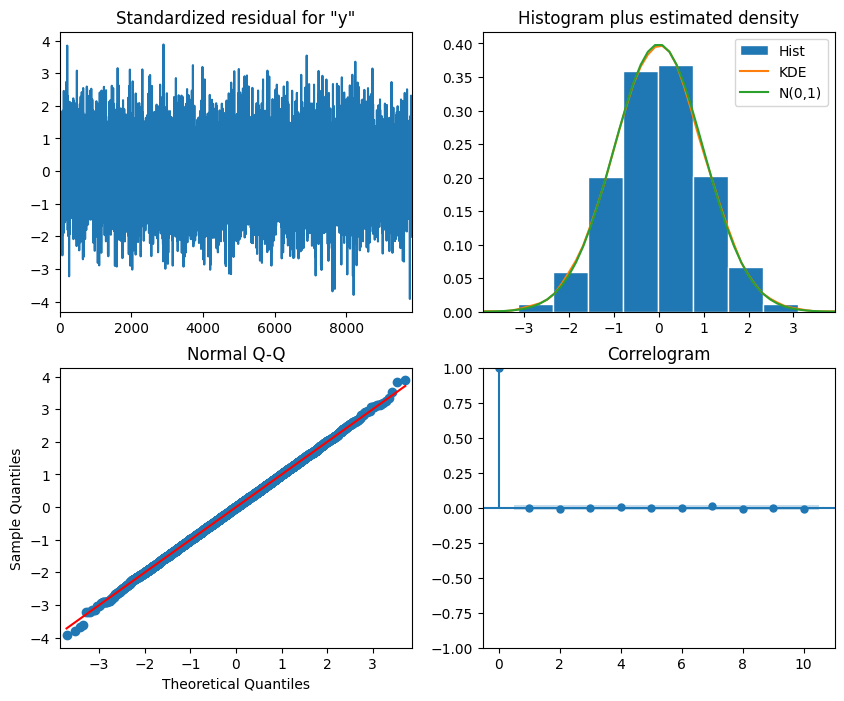

In [ ]:
## More qualitative residual analysis ##
model_fit.plot_diagnostics(figsize=(10, 8));

# Intuition:
# top left: no trend in residual, mean seems stable over time -> stationary
# top right: symmetrical distribution & mean=0 -> residuals are normally distributed
# bottom left: y=x -> residuals seem to be normally distributed
# bottom right: No significant coefficient beyond lag 0 -> no autocorrelation
# Properties of white noice: normally distributed, stationary, uncorrelated

## Predicting ARMA process

In [ ]:
## Forecasting hourly bandwidth usage for next 2h using ARMA(2,2) over 7 days ##

# To execute rolling forecasts
def rolling_forecast(df: pd.DataFrame,
                     train_len: int,
                     test_len: int,
                     window: int,
                     method: str) -> list:

    total_len = train_len + test_len

    # As time series increases by window period, new mean is calculated
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = df.iloc[:train_len,].mean()
            pred_mean.extend(mean.to_list() * window)
        return pred_mean

    # As time series increases by window period, new last value is extracted
    elif method == 'last':
        pred_last = []
        for i in range(train_len, total_len, window):
            last_value = df.iloc[i-1,]
            pred_last.extend(last_value.to_list() * window)
        return pred_last

    # As time series increases by window period, new ARMA is calculated
    elif method == 'ARMA':
        pred_arma = []
        for i in range(train_len, total_len, window):
            arma_model = SARIMAX(df.iloc[:i,], order=(2, 0, 2))
            res = arma_model.fit()
            predictions = res.get_prediction(0, i + window -1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_arma.extend(oos_pred)
        return pred_arma

# Forecasting using historical mean, last value, and AR(3)
df_diff = pd.DataFrame(hourly_bandwidth_diff, columns=['bandwidth_diff'])
TRAIN_LEN = len(train)
TEST_LEN = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'mean')
pred_last = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'last')
pred_arma = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'ARMA')

df_pred = pd.DataFrame({'pred_mean' : pred_mean, 'pred_last' : pred_last,
                        'pred_ARMA' : pred_arma, 'actual': test})

df_all = pd.merge(df_diff, df_pred, left_on='bandwidth_diff', right_on='actual', how='left')

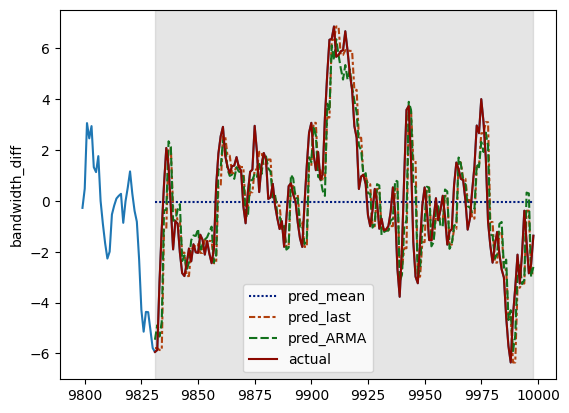

In [ ]:
## Assessing prediction models ##
from sklearn.metrics import mean_squared_error

# Visualising forecasts
sns.lineplot(df_all.iloc[-200:,0], legend=False)
sns.lineplot(df_all.iloc[:,1:], palette='dark', style_order=['actual', 'pred_ARMA', 'pred_mean', 'pred_last'])
plt.axvspan(9831, 9998, color='grey', alpha=0.2)

# Calculating MSE
mse_mean = mean_squared_error(df_pred['actual'], df_pred['pred_mean'])
mse_last = mean_squared_error(df_pred['actual'], df_pred['pred_last'])
mse_ARMA = mean_squared_error(df_pred['actual'], df_pred['pred_ARMA'])

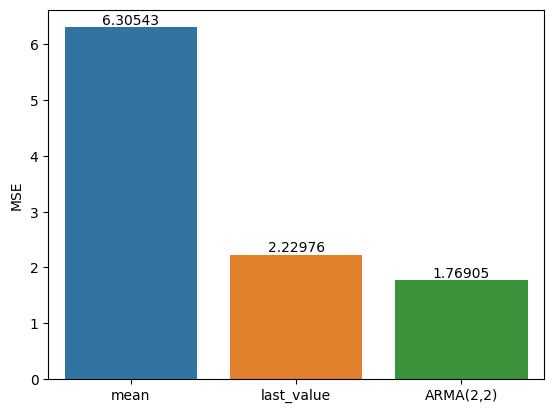

In [ ]:
# Plot MSEs
mse_data = {
    'name':['mean', 'last_value', 'ARMA(2,2)'],
    'mse':[mse_mean, mse_last, mse_ARMA]
    }

_, ax = plt.subplots()
sns.barplot(data=mse_data, x='name', y='mse')
ax.bar_label(ax.containers[0])
plt.ylabel('MSE');

# Intuition:
# ARMA(2,2) outperforms the benchmark models -> is a well-performing model

8.412254083432842


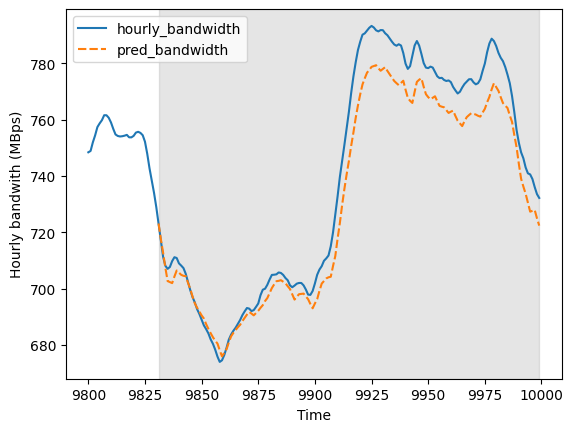

In [ ]:
# Inverse-transform the forecasted differenced dataset to original scale
df_bandwidth.loc[len(train):len(train)+len(test),'pred_bandwidth'] = np.insert(pred_arma, 0, df_bandwidth.iloc[-len(test)-1,0]).cumsum()

# 0 to 9830 -> train set
# 9831 to 9998 -> test set
# Use first value of test set as initial value Y_0 for inverse-transforming
# Then perform a cumulative sum

## Assessing prediction models ##

# Plot ARMA(2,2) bandwidth forecast
sns.lineplot(df_bandwidth.iloc[-200:,])
plt.axvspan(9831, 9999, color='grey', alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Hourly bandwith (MBps)')

# Intuition from forecast graph:
# ARMA(2,2) graph closely follows general trend of observed values, but don't predict bigger troughs and peaks

# Calculating MAE
# Reporting values and errors in original scale of data to make sense from business perspective
from sklearn.metrics import mean_absolute_error
mae_ARMA_undiff = mean_absolute_error(df_bandwidth.loc[9832:, 'hourly_bandwidth'], df_bandwidth.loc[9832:, 'pred_bandwidth'])
print(mae_ARMA_undiff)

# Notice that mae is calculated using 9832 to 9999 -> 9831's prediction == actual value

# Results:
# Mean absolute error = 8.41
# Our predictions are on average 8.41 Mbps above/below the actual bandwidth usage

# Autoregressive Integrated Moving Average Model

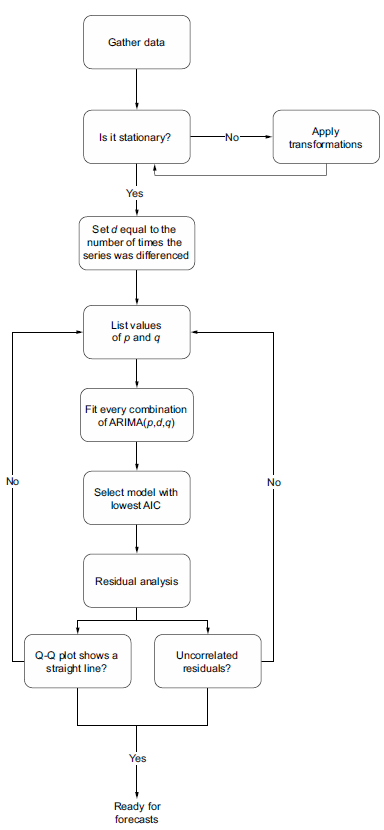

ARIMA(p,d,q):&ensp;$Y'_t=C+\phi_1Y'_{t-1}+...+\phi_pY'_{t-p}+μ+ϵ_t+θ_1ϵ'_{t-1}+...+θ_qϵ'_{t-q}$

## Identifying ARIMA process

ADF_null: (2.7420165734574744, 1.0, 11, 72, {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}, 82.63760283301104)
ADF_1_diff: (-0.40740976363804615, 0.9088542416911305, 10, 72, {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}, 89.21317134038213)
ADF_2_diff: (-3.585162874793155, 0.006051099869603682, 9, 72, {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}, 87.33900055833058)


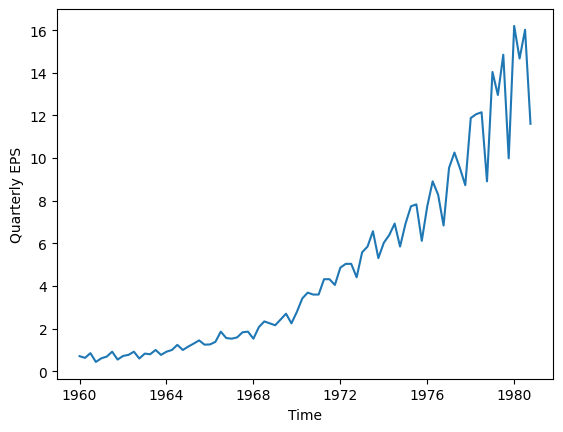

In [ ]:
## Forecasting JNJ quarterly EPS for 1 year ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Import data
df_eps = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/JNJ.csv", parse_dates=['date'])

# Plot data
sns.lineplot(data=df_eps, x='date', y='data')
plt.xlabel('Time')
plt.ylabel('Quarterly EPS')

# Intuition from graph:
# Exhibits long-term positive trend with peaks and troughs -> non-stationary process

# Test for stationary
ADF_result = adfuller(df_eps['data'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 1 > 0.05
# ADF statistic = 2.74 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
eps_diff = np.diff(df_eps['data'], n=1)

# Test for stationary again
ADF_diff_result = adfuller(eps_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 0.91 > 0.05
# ADF statistic = -0.41 < rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying second order differencing
eps_diff_2 = np.diff(df_eps['data'], n=2)

# Test for stationary again
ADF_diff_2_result = adfuller(eps_diff_2)
print("ADF_2_diff:", ADF_diff_2_result)

# Results:
# p-value = 0.006 < 0.05
# ADF statistic = -3.59 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

In [ ]:
## Determining the order p and q for ARMA process ##
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.gofplots import qqplot

# Spliting dataset into train & test sets
train = df_eps.loc[df_eps.date < '1980',:]
test = df_eps.loc[df_eps.date >= '1980',:]

# Defining posssible values of p & q (0 to 3)
order_list = list(product(range(4), repeat=2))

# Fitting data to all unique ARMA(p,q) models
def optimise_ARMA(endog, order_list: list, d: int) -> pd.DataFrame:
    """
    Args:
        endog: data to be fitted
        order_list: list containing the (p,q) orders in tuples
        d: order of integration

    Returns: DataFrame containing AIC results for different (p,d,q) orders
    """
    results = []

    for p, q in order_list:
            model = SARIMAX(endog, order=(p, d, q)).fit()
            aic = model.aic
            results.append([(p,d,q), aic])

    result_df = pd.DataFrame(results, columns=['(p,d,q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

    return result_df

# Using Akaike information criterion to select optimal model
AIC_result = optimise_ARMA(train.data, order_list, 2)
AIC_result

# Intuition:
# Select ARIMA(3,2,3) as optimal model since it has the lowest AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conve

,"(p,d,q)",AIC
0,"(3, 2, 3)",115.266637
1,"(3, 2, 1)",115.624980
2,"(3, 2, 2)",115.672007
3,"(3, 2, 0)",154.430625
4,"(0, 2, 3)",194.654716
5,"(0, 2, 2)",209.274868
6,"(2, 2, 3)",220.666965
7,"(1, 2, 3)",228.267730
8,"(1, 2, 2)",228.935782
9,"(2, 2, 2)",229.974691


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,lb_stat,lb_pvalue
1,1.652020,0.198684
2,1.654544,0.437241
3,7.276173,0.063597
4,9.231226,0.055573
5,9.853425,0.079497
6,10.097125,0.120621
7,10.346926,0.169751
8,10.379005,0.239426
9,10.721222,0.295303
10,11.159917,0.345196


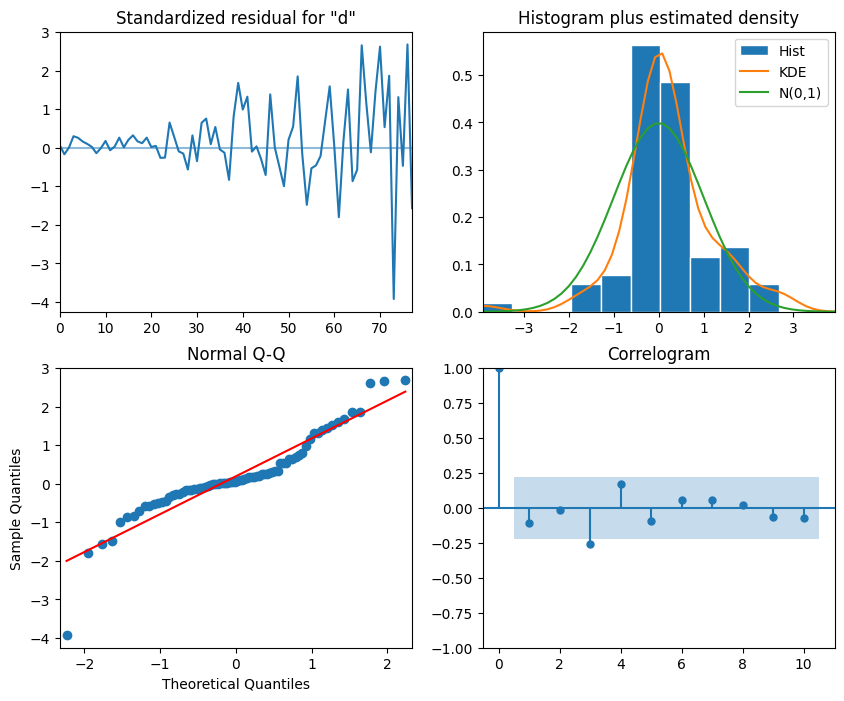

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Qualitative residual analysis - QQ plot (model's residuals normally distributed?)
model = SARIMAX(train.data, order=(3,2,3))
model_fit = model.fit()
residuals = model_fit.resid
model_fit.plot_diagnostics(figsize=(10, 8));

# Intuition:
# top left: no trend in residual, variance not constant over time -> discrepancy from white noise
# top right: symmetrical distribution & mean=0 -> residuals are normally distributed
# bottom left: fairly straight y=x line -> residuals seem to be normally distributed
# bottom right: significant coefficient at lag 3, but not continuous, likely due to change. No significant coefficient beyond lag 0 -> no autocorrelation
# Properties of white noice: normally distributed, stationary, uncorrelated

# Quantitative residual analysis - Ljung-Box test (model's residuals are uncorrelated?)
acorr_ljungbox(residuals, 10)       # Apply Ljung-Box test on residuals for 10 lags

# Intuition from Ljung-Box test:
# H0: residuals are iid, no autocorrelation
# All p-value > 0.05, cannot reject null hypothesis at each lag
# Conclude that residuals are uncorrelated

# Residuals are completely random -> ARAM(2,2) model fits our data well

## Predicting ARIMA process

In [ ]:
## Forecasting JNJ quarterly EPS for 1 year ##

# Benchmark model - naive seasonal forecast
test.loc[:,'naive_seasonal_pred'] = df_eps.shift(4).iloc[-4:]['data']

# ARIMA(3,2,3) model
eps_pred = model_fit.get_prediction(80, 83).predicted_mean
test['ARIMA_pred'] = eps_pred

<ipython-input-46-e27c449bedf4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'naive_seasonal_pred'] = df_eps.shift(4).iloc[-4:]['data']
<ipython-input-46-e27c449bedf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = eps_pred


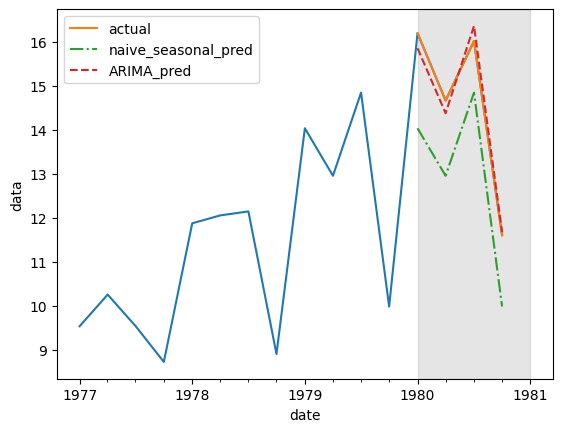

In [ ]:
## Assessing prediction models ##
import matplotlib.dates as mdates
import datetime

# Visualising forecasts
fig, ax = plt.subplots()
sns.lineplot(data=df_eps.iloc[-16:,:], x='date', y='data', legend=False, ax=ax)
sns.lineplot(data=test, x='date', y='data', label='actual', ax=ax)
sns.lineplot(data=test, x='date', y='naive_seasonal_pred', label='naive_seasonal_pred', linestyle='dashdot', ax=ax)
sns.lineplot(data=test, x='date', y='ARIMA_pred', label='ARIMA_pred', linestyle='dashed', ax=ax)
plt.axvspan(datetime.datetime(1980,1,1), datetime.datetime(1981,1,1), color='grey', alpha=0.2)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))
# Warning: must explicitly assign date column in all plots to use DateFormatter!

# Calculating MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

mape_naive_seasonal = mape(test['data'], test['naive_seasonal_pred'])
mape_ARIMA = mape(test['data'], test['ARIMA_pred'])

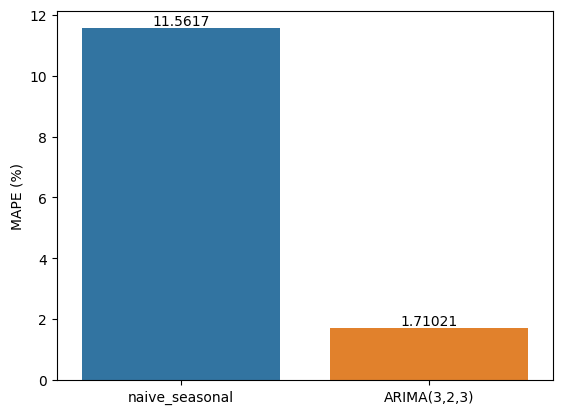

In [ ]:
# Plot MSEs
mse_data = {
    'name':['naive_seasonal', 'ARIMA(3,2,3)'],
    'mape':[mape_naive_seasonal, mape_ARIMA]
    }

_, ax = plt.subplots()
sns.barplot(data=mse_data, x='name', y='mape')
ax.bar_label(ax.containers[0])
plt.ylabel('MAPE (%)');

# Intuition:
# ARIMA(3,2,3) greatly outperforms the benchmark model -> is a well-performing model

# Seasonal Autoregressive Integrated Moving Average Model

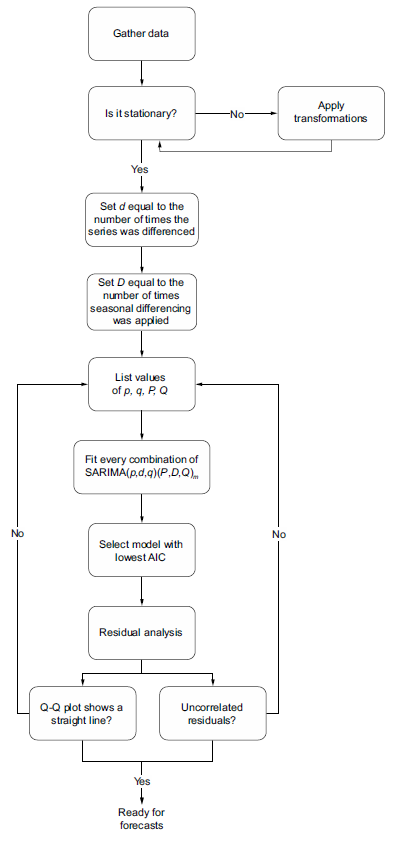

SARIMA(p,d,q)(P,D,Q)$_m$:&ensp;$Y'_t=C+\phi_1Y'_{t-1}+...+\phi_pY'_{t-p}+μ+ϵ_t+θ_1ϵ'_{t-1}+...+θ_qϵ'_{t-q}$

## Identifying SARIMA process

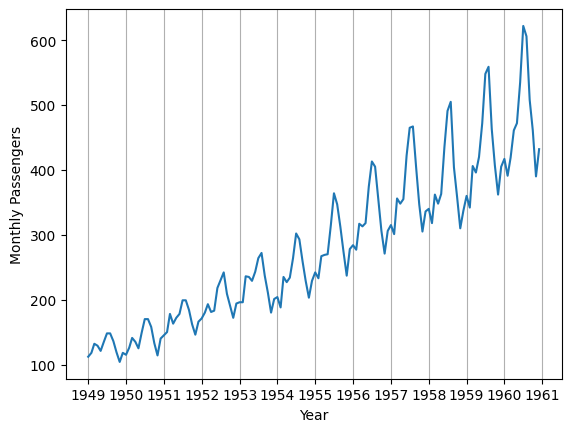

In [ ]:
## Forecasting number of monthly air passengers for one year ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Import data
df_passenger = pd.read_csv("/content/drive/MyDrive/Practice/Time Series/Data/air_passengers.csv", parse_dates=['Month'])

# Plot data
fig, ax = plt.subplots()
sns.lineplot(data=df_passenger, x='Month', y='Passengers', ax=ax)
ax.grid(True, axis='x')
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Year')
plt.ylabel('Monthly Passengers')

# Intuition from graph:
# Exhibits long-term positive trend with peaks and troughs -> non-stationary process
# Periodic yearly pattern - fewer passengers from November to January, spikes up during June to August

# Spliting dataset into train & test sets
train = df_passenger.loc[df_passenger.Month.dt.year != 1960,:]
test = df_passenger.loc[df_passenger.Month.dt.year == 1960,]

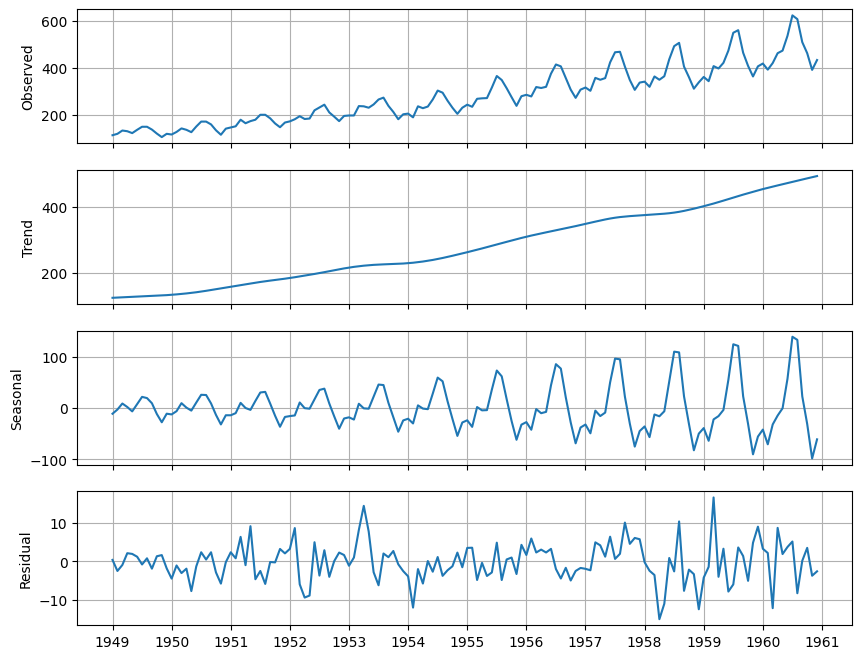

In [ ]:
## Identifying seasonality ##
from statsmodels.tsa.seasonal import STL

# Applying time series decomposition
decomposition = STL(df_passenger['Passengers'], period=12).fit()

# Plotting time series decomposition
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10,8))

sns.lineplot(decomposition.observed, ax=ax[0])
ax[0].set_ylabel('Observed')

sns.lineplot(decomposition.trend, ax=ax[1])
ax[1].set_ylabel('Trend')

sns.lineplot(decomposition.seasonal, ax=ax[2])
ax[2].set_ylabel('Seasonal')

sns.lineplot(decomposition.resid, ax=ax[3])
ax[3].set_ylabel('Residual')

for ax in ax:
    ax.grid(True)

plt.xticks(np.arange(0, len(decomposition.observed)+1, 12), np.arange(1949, 1962, 1));

In [ ]:
# Test for stationary (differencing only)
ADF_result = adfuller(df_passenger['Passengers'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 0.99 > 0.05
# ADF statistic = 0.82 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
passenger_diff = np.diff(df_passenger['Passengers'], n=1)

# Test for stationary again
ADF_diff_result = adfuller(passenger_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 0.054 > 0.05
# ADF statistic = -2.83 < rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying second order differencing
passenger_diff_2 = np.diff(df_passenger['Passengers'], n=2)

# Test for stationary again
ADF_diff_2_result = adfuller(passenger_diff_2)
print("ADF_2_diff:", ADF_diff_2_result)

# Results:
# p-value = 2.7e^-29 < 0.05
# ADF statistic = -16.38 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

ADF_null: (0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF_1_diff: (-2.8292668241700047, 0.05421329028382478, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)
ADF_2_diff: (-16.384231542468513, 2.7328918500142026e-29, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.6020417275611)


In [ ]:
## Determining the order p, q for ARIMA process ##
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining posssible values of p, q, P, Q (0 to 12)
p = range(13)
q = range(13)
P = [0]
Q = [0]

# d = 2
# D = 0
# s = 12

ARIMA_order_list = list(product(p, q, P, Q))

# Fitting data to all unique ARMA(p,q) models
def optimise_SARIMA(endog, order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    """
    Args:
        endog: data to be fitted
        order_list: list containing the (p,q,P,Q) orders in tuples
        d: order of integration
        D: seasonal order of integration
        s: frequency

    Returns: DataFrame containing AIC results for different (p,d,q,P,D,Q) orders
    """
    results = []

    for p, q, P, Q in order_list:
            model = SARIMAX(endog, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
            aic = model.aic
            results.append([((p,d,q),(P,D,Q)), aic])

    result_df = pd.DataFrame(results, columns=['(p,d,q),(P,D,Q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

    return result_df

# Using Akaike information criterion to select optimal model
AIC_result = optimise_SARIMA(train.Passengers, ARIMA_order_list, 2, 0, 12)
AIC_result

# Intuition:
# Select SARIMA(11,2,3)(0,0,0) or ARIMA(11,2,3) as optimal model since it has the lowest AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWar

,"(p,d,q),(P,D,Q)",AIC
0,"((11, 2, 3), (0, 0, 0))",1016.842652
1,"((11, 2, 4), (0, 0, 0))",1019.034751
2,"((11, 2, 5), (0, 0, 0))",1020.379289
3,"((11, 2, 1), (0, 0, 0))",1021.025922
4,"((12, 2, 0), (0, 0, 0))",1021.169865
...,...,...
164,"((5, 2, 0), (0, 0, 0))",1281.732157
165,"((3, 2, 0), (0, 0, 0))",1300.282335
166,"((2, 2, 0), (0, 0, 0))",1302.913196
167,"((1, 2, 0), (0, 0, 0))",1308.152194


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,lb_stat,lb_pvalue
1,6.539124,0.010553
2,6.667840,0.035653
3,6.943387,0.073724
4,7.736593,0.101718
5,8.377928,0.136601
6,8.669212,0.193054
7,9.493241,0.219155
8,9.731307,0.284393
9,9.741755,0.371793
10,11.546080,0.316583


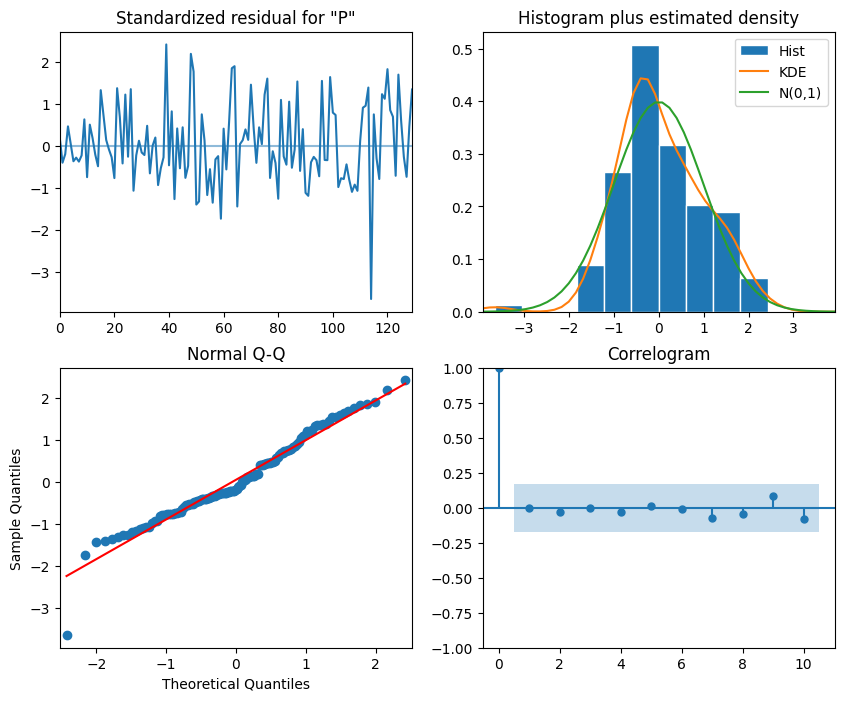

In [ ]:
## Assessing the ARIMA model ##
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Qualitative residual analysis - QQ plot (model's residuals normally distributed?)
ARIMA_model = SARIMAX(train.Passengers, order=(11,2,3))
ARIMA_model_fit = ARIMA_model.fit()
ARIMA_residuals = ARIMA_model_fit.resid
ARIMA_model_fit.plot_diagnostics(figsize=(10, 8));

# Intuition:
# top left: no trend in residual, variance fairly constant over time -> resembles white noise
# top right: fairly symmetrical distribution -> residuals are approximately normally distributed
# bottom left: fairly straight y=x line -> residuals seem to be normally distributed
# bottom right: no significant coefficient beyond lag 0 -> no autocorrelation
# Properties of white noice: normally distributed, stationary, uncorrelated
# Residuals resemble white noise -> errors are random

# Quantitative residual analysis - Ljung-Box test (model's residuals are uncorrelated?)
acorr_ljungbox(ARIMA_residuals, 10)       # Apply Ljung-Box test on residuals for 10 lags

# Intuition from Ljung-Box test:
# H0: residuals are iid, no autocorrelation
# First 2 p-value < 0.05  -> Reject H0 at 5% significance level
# 3rd p-value onwards > 0.05
# Conclude that residuals are uncorrelated starting at lag 3

# Residuals are not completely random -> ARIMA(11,2,3) model doex not fits our data well

In [ ]:
# Test for stationary (differencing and seasonal differencing)
ADF_result = adfuller(df_passenger['Passengers'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 0.99 > 0.05
# ADF statistic = 0.82 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
passenger_diff = np.diff(df_passenger['Passengers'], n=1)

# Test for stationary again
ADF_diff_result = adfuller(passenger_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 0.054 > 0.05
# ADF statistic = -2.83 < rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying seasonal differencing
passenger_seasonal_diff = np.diff(passenger_diff, n=12)    # m = 12

# Test for stationary again
ADF_seasonal_diff_result = adfuller(passenger_seasonal_diff)
print("ADF_2_diff:", ADF_seasonal_diff_result)

# Results:
# p-value = 3.8e^-30 < 0.05
# ADF statistic = -17.62 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

# 1 round of differencing + 1 round of seasonal differencing -> d=1, D=1

ADF_null: (0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF_1_diff: (-2.8292668241700047, 0.05421329028382478, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)
ADF_2_diff: (-17.62486236026156, 3.823046855601547e-30, 13, 117, {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}, 1643.2206602574734)


In [ ]:
## Determining the order p, q, P, Q for SARIMA process ##
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining posssible values of p, q, P, Q (0 to 3)
p = range(4)
q = range(4)
P = range(4)
Q = range(4)

# d = 1
# D = 1
# s = 12

SARIMA_order_list = list(product(p, q, P, Q))

# Fitting data to all unique SARMA(p,q) models
def optimise_SARIMA(endog, order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    """
    Args:
        endog: data to be fitted
        order_list: list containing the (p,q,P,Q) orders in tuples
        d: order of integration
        D: seasonal order of integration
        s: frequency

    Returns: DataFrame containing AIC results for different (p,d,q,P,D,Q) orders
    """
    results = []

    for p, q, P, Q in order_list:
            model = SARIMAX(endog, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
            aic = model.aic
            results.append([((p,d,q),(P,D,Q)), aic])

    result_df = pd.DataFrame(results, columns=['(p,d,q),(P,D,Q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

    return result_df

# Using Akaike information criterion to select optimal model
AIC_result = optimise_SARIMA(train.Passengers, SARIMA_order_list, 1, 1, 12)
AIC_result

# Intuition:
# Select SARIMA(2,1,1)(1,1,2)12 as optimal model since it has the lowest AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Convergen

,"(p,d,q),(P,D,Q)",AIC
0,"((2, 1, 1), (1, 1, 2))",892.240189
1,"((2, 1, 1), (1, 1, 3))",894.110325
2,"((1, 1, 0), (1, 1, 2))",894.285656
3,"((0, 1, 1), (1, 1, 2))",894.991643
4,"((1, 1, 0), (2, 1, 1))",895.092629
...,...,...
251,"((0, 1, 0), (2, 1, 0))",906.940147
252,"((3, 1, 2), (0, 1, 3))",907.181875
253,"((0, 1, 0), (3, 1, 2))",907.603099
254,"((0, 1, 0), (3, 1, 0))",908.742583


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,lb_stat,lb_pvalue
1,0.004663,0.945557
2,0.744726,0.689104
3,1.019752,0.796473
4,1.226798,0.873667
5,1.437233,0.920197
6,1.711221,0.944252
7,2.306318,0.940962
8,2.720695,0.950645
9,2.737284,0.973807
10,4.976578,0.892737


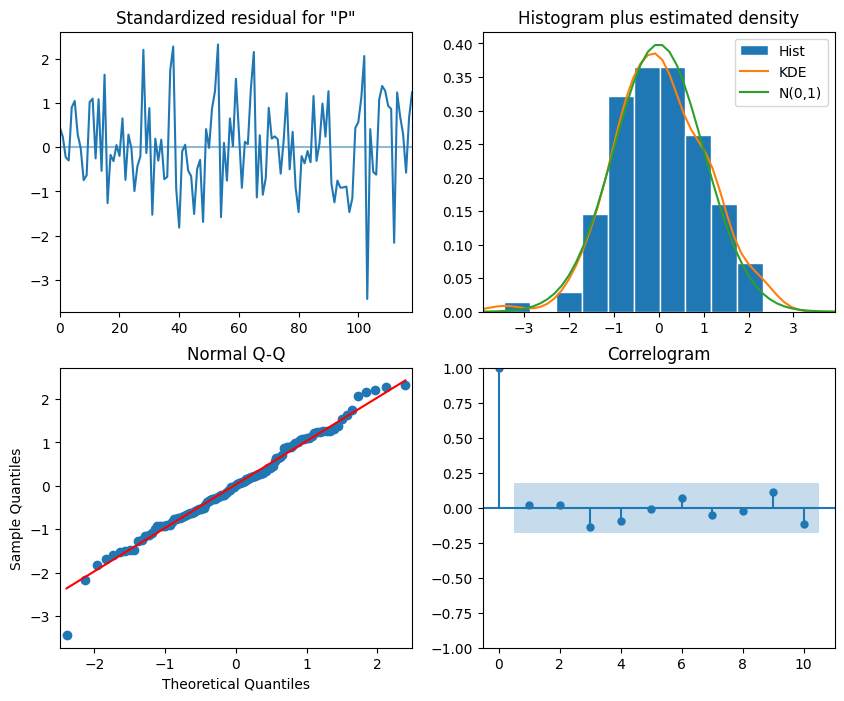

In [ ]:
## Assessing the SARIMA model ##
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Qualitative residual analysis - QQ plot (model's residuals normally distributed?)
SARIMA_model = SARIMAX(train.Passengers, order=(2,1,1), seasonal_order=(1,1,2,12))
SARIMA_model_fit = SARIMA_model.fit()
SARIMA_residuals = SARIMA_model_fit.resid
SARIMA_model_fit.plot_diagnostics(figsize=(10, 8));

# Intuition:
# top left: no trend in residual, variance fairly constant over time -> resembles white noise
# top right: fairly symmetrical distribution -> residuals are approximately normally distributed
# bottom left: fairly straight y=x line -> residuals seem to be normally distributed
# bottom right: no significant coefficient beyond lag 0 -> no autocorrelation
# Properties of white noice: normally distributed, stationary, uncorrelated
# Residuals resemble white noise -> errors are random

# Quantitative residual analysis - Ljung-Box test (model's residuals are uncorrelated?)
acorr_ljungbox(SARIMA_residuals, 10)       # Apply Ljung-Box test on residuals for 10 lags

# Intuition from Ljung-Box test:
# H0: residuals are iid, no autocorrelation
# All p-value > 0.05, cannot reject null hypothesis at each lag
# Conclude that residuals are uncorrelated

# Residuals are completely random -> SARIMA(2,1,1)(1,1,2)12 model fits our data well

## Predicting SARIMA process

In [ ]:
## Forecasting number of monthly air passengers for one year ##

# Forecasting using naive seasonal method (benchmark)
test.loc[:,'naive_seasonal_pred'] = df_passenger.shift(12).iloc[-12:,].Passengers

# Forecasting using ARIMA(11,2,3)
ARIMA_pred = ARIMA_model_fit.get_prediction(test.index[0], test.index[-1]).predicted_mean
test.loc[:,'ARIMA_pred'] = ARIMA_pred

# Forecasting using SARIMA(2,1,1)(1,1,2)12
SARIMA_pred = SARIMA_model_fit.get_prediction(test.index[0], test.index[-1]).predicted_mean
test.loc[:,'SARIMA_pred'] = SARIMA_pred

<ipython-input-57-aeb554ce4696>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'naive_seasonal_pred'] = df_passenger.shift(12).iloc[-12:,].Passengers
<ipython-input-57-aeb554ce4696>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'ARIMA_pred'] = ARIMA_pred
<ipython-input-57-aeb554ce4696>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

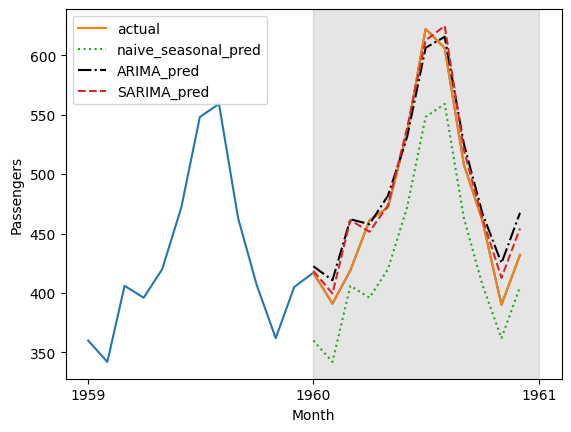

In [ ]:
## Assessing prediction models ##
import datetime

# Visualising forecasts
fig, ax = plt.subplots()
sns.lineplot(data=df_passenger.loc[df_passenger.Month >= '1959',:], x='Month', y='Passengers', ax=ax)
sns.lineplot(data=test, x='Month', y='Passengers', label='actual', ax=ax)
sns.lineplot(data=test, x='Month', y='naive_seasonal_pred', label='naive_seasonal_pred', linestyle='dotted', ax=ax)
sns.lineplot(data=test, x='Month', y='ARIMA_pred', label='ARIMA_pred', linestyle='dashdot', color='black', ax=ax)
sns.lineplot(data=test, x='Month', y='SARIMA_pred', label='SARIMA_pred', linestyle='dashed', ax=ax)
plt.axvspan(datetime.datetime(1960,1,1), datetime.datetime(1961,1,1), color='grey', alpha=0.2)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())
# Warning: must explicitly assign date column in all plots to use DateFormatter!

# Calculating MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal_pred'])
mape_ARIMA = mape(test['Passengers'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Passengers'], test['SARIMA_pred'])

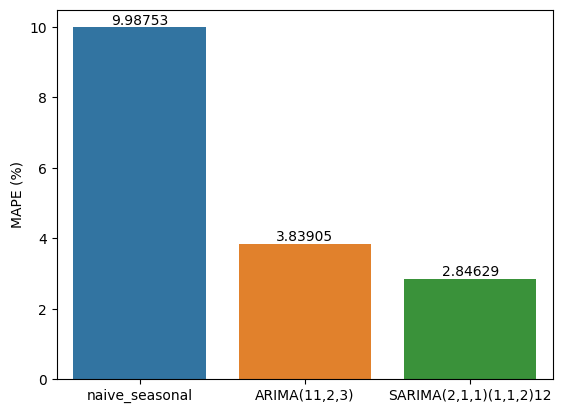

In [ ]:
# Plot MAPEs
mse_data = {
    'name':['naive_seasonal', 'ARIMA(11,2,3)', 'SARIMA(2,1,1)(1,1,2)12'],
    'mape':[mape_naive_seasonal, mape_ARIMA, mape_SARIMA]
    }

_, ax = plt.subplots()
sns.barplot(data=mse_data, x='name', y='mape')
ax.bar_label(ax.containers[0])
plt.ylabel('MAPE (%)');

# Intuition:
# SARIMA(2,1,1)(1,1,2)12 is the best performing model

# Seasonal Autoregressive Integrated Moving Average Model with Exogenous

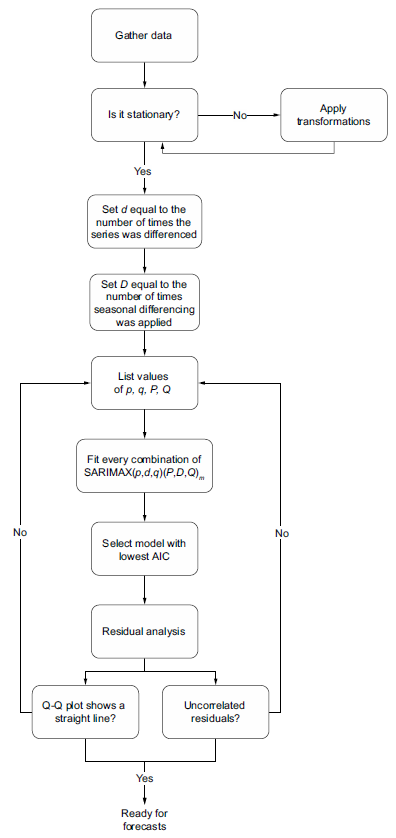

SARIMAX:&ensp;$Y_t=SARIMA(p,d,q)(P,D,Q)_m+∑_{i=1}^nβ_iX_t^i$


## Identifying SARIMAX process

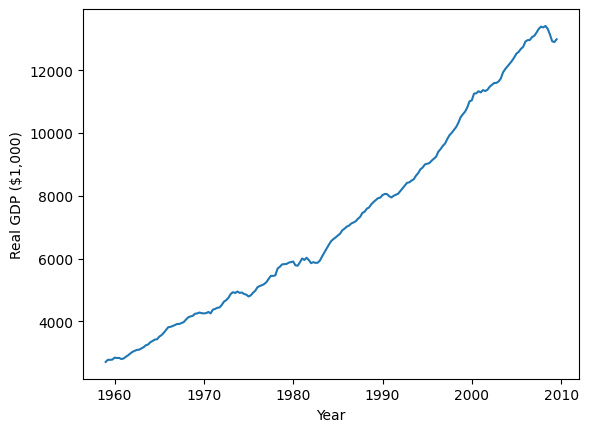

In [ ]:
## Forecasting USA's real GDP ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Import data
gdp_df = sm.datasets.macrodata.load_pandas().data

# Plot endogenous/target variable
gdp_df['date'] = gdp_df.year.astype(int).astype(str) + "Q" + gdp_df.quarter.astype(int).astype(str)
gdp_df['date'] = pd.to_datetime(gdp_df['date'])
sns.lineplot(data=gdp_df, x='date', y='realgdp')
plt.xlabel('Year')
plt.ylabel('Real GDP ($1,000)')

# Intuition from graph:
# Exhibits long-term positive trend -> non-stationary process
# No clear cyclical pattern -> seasonality is not present

# Spliting dataset into train & test sets
gdp_target_df = gdp_df.loc[:, 'realgdp']
gdp_exog_df =  gdp_df.loc[:, ['realcons', 'realinv', 'realgovt', 'realdpi', 'cpi']]
train_target = gdp_df.loc[gdp_df.year <= 2008, 'realgdp']
train_exog = gdp_df.loc[gdp_df.year <= 2008, ['realcons', 'realinv', 'realgovt', 'realdpi', 'cpi']]
test_target = gdp_df.loc[gdp_df.year > 2008, 'realgdp']

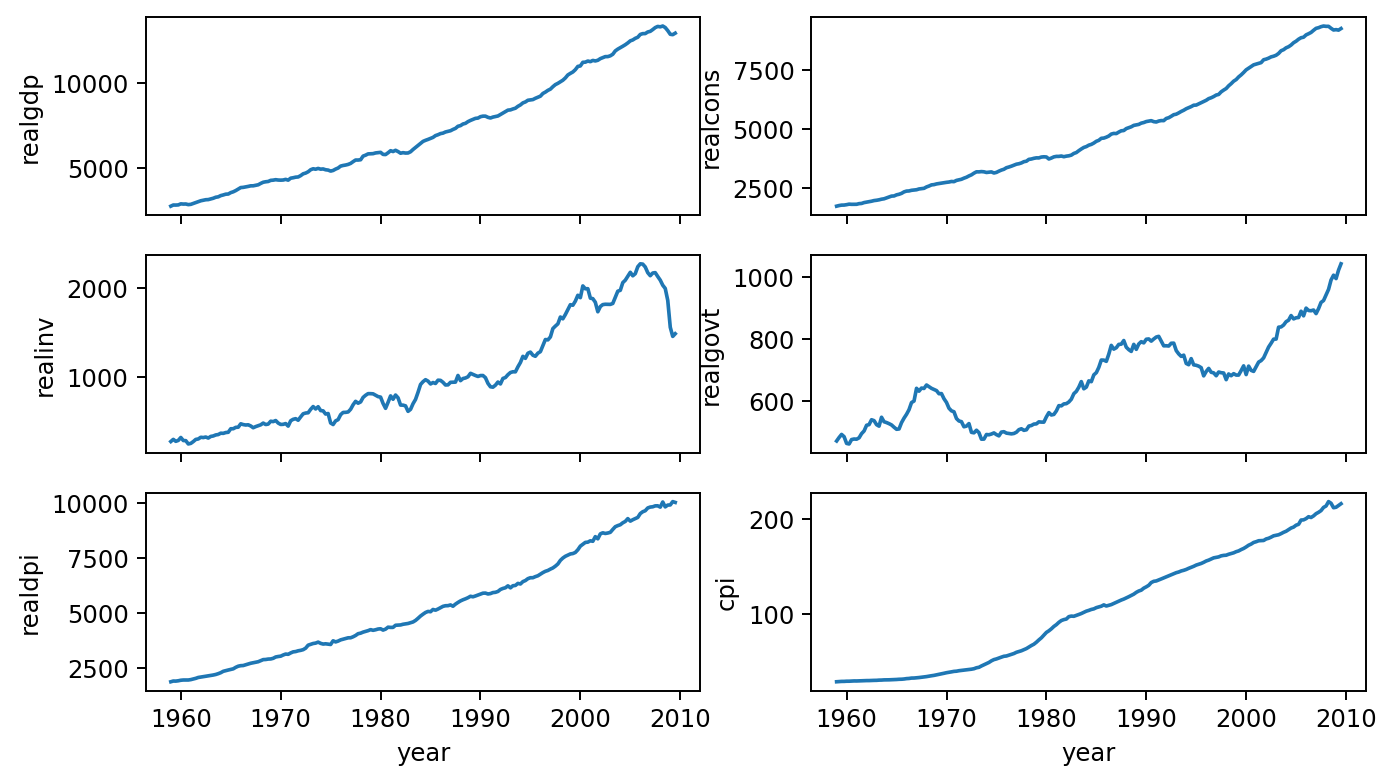

In [ ]:
# Plot exogenous/input variable
fig, axs = plt.subplots(3,2, sharex=True, dpi=175, figsize=(8,5))
for i, ax in enumerate(axs.flatten()):
    sns.lineplot(x=gdp_df['date'], y=gdp_df.iloc[:,i+2], ax=ax)
    ax.set_xlabel('year')

In [ ]:
# Test for stationary
ADF_result = adfuller(gdp_df['realgdp'])
print("ADF_null:", ADF_result)

# Results:
# p-value = 0.998 > 0.05
# ADF statistic = 1.75 > rejection zone (lies outside)
# Do not reject null hypothesis, cannot conclude time series is stationary.

# Applying first order differencing
gdp_diff = np.diff(gdp_df['realgdp'], n=1)

# Test for stationary again
ADF_diff_result = adfuller(gdp_diff)
print("ADF_1_diff:", ADF_diff_result)

# Results:
# p-value = 3.3e^-08 > 0.05
# ADF statistic = -6.31 < rejection zone (lies within)
# Reject null hypothesis, conclude time series is stationary.

ADF_null: (1.7504627967647144, 0.9982455372335032, 12, 190, {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}, 2034.517123668382)
ADF_1_diff: (-6.305695561658106, 3.327882187668224e-08, 1, 200, {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}, 2024.992358126391)


In [ ]:
## Determining the order p, q, P, Q for SARIMAX process ##
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining posssible values of p, q, P, Q (0 to 3)
p = range(4)
q = range(4)
P = range(4)
Q = range(4)

# d = 1
# D = 0
# s = 4     # Since data is collected quarterly, m=4

SARIMAX_order_list = list(product(p, q, P, Q))

# Fitting data to all unique SARIMAX(p,q) models
def optimise_SARIMAX(endog, exog, order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    """
    Args:
        endog: endogenous data to be fitted
        exog: exogenous data to be fitted
        order_list: list containing the (p,q,P,Q) orders in tuples
        d: order of integration
        D: seasonal order of integration
        s: frequency

    Returns: DataFrame containing AIC results for different (p,d,q,P,D,Q) orders
    """
    results = []

    for p, q, P, Q in order_list:
            model = SARIMAX(endog, exog, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
            aic = model.aic
            results.append([((p,d,q),(P,D,Q)), aic])

    result_df = pd.DataFrame(results, columns=['(p,d,q),(P,D,Q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

    return result_df

# Using Akaike information criterion to select optimal model
AIC_result = optimise_SARIMAX(train_target, train_exog, SARIMAX_order_list, 1, 0, 4)
AIC_result

# Intuition:
# Select SARIMAX(3,1,3)(0,0,0)4 OR ARIMAX(3,1,3) as optimal model since it has the lowest AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

,"(p,d,q),(P,D,Q)",AIC
0,"((3, 1, 3), (0, 0, 0))",1742.824297
1,"((3, 1, 3), (1, 0, 0))",1744.966208
2,"((3, 1, 3), (0, 0, 1))",1744.996576
3,"((2, 1, 2), (0, 0, 0))",1745.449024
4,"((2, 1, 2), (0, 0, 1))",1746.323743
...,...,...
251,"((0, 1, 2), (0, 0, 0))",1761.579044
252,"((0, 1, 3), (0, 0, 0))",1762.317095
253,"((0, 1, 0), (0, 0, 0))",1764.754980
254,"((1, 1, 0), (0, 0, 0))",1765.379412


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  200
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -859.412
Date:                Thu, 14 Sep 2023   AIC                           1742.824
Time:                        10:57:12   BIC                           1782.344
Sample:                             0   HQIC                          1758.819
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
realcons       0.9708      0.045     21.505      0.000       0.882       1.059
realinv        1.0132      0.033     30.693      0.000       0.948       1.078
realgovt       0.7283      0.127      5.728      0.0

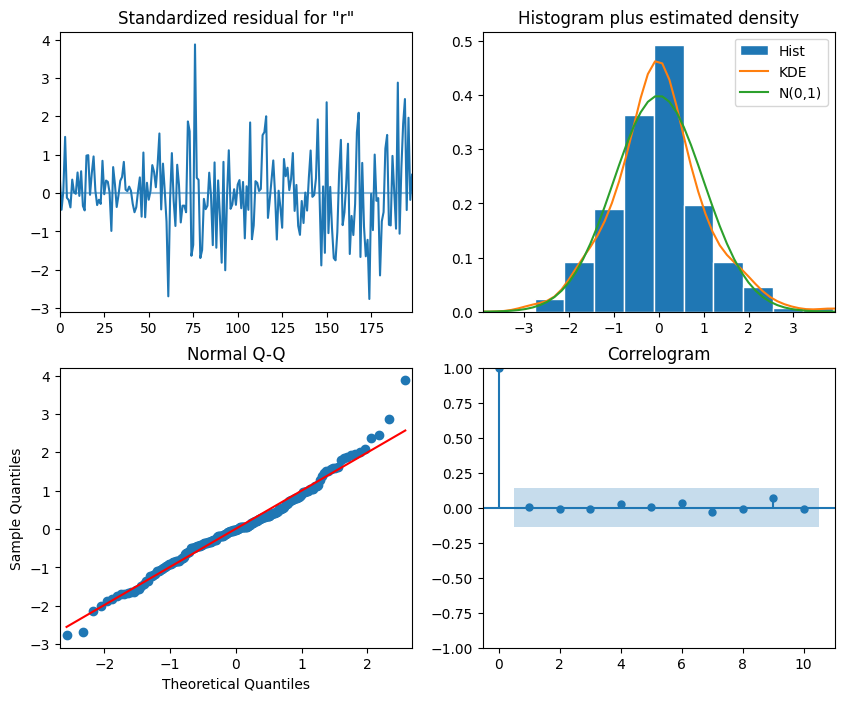

In [ ]:
## Assessing the SARIMA model ##
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assessing exogenous variables
SARIMAX_model = SARIMAX(train_target, train_exog, order=(3,1,3), seasonal_order=(0,0,0,4))
SARIMAX_model_fit = SARIMAX_model.fit()
print(SARIMAX_model_fit.summary())

# Intuition:
# Except for realdpi, p-value for all exogenous variables < 0.05
# Coefficient of realdpi is not significantly different from 0
# However, p-value does not determine the relevance of predictors in forcasting models

# Qualitative residual analysis - QQ plot (model's residuals normally distributed?)
SARIMAX_model_fit.plot_diagnostics(figsize=(10, 8));

# Intuition:
# top left: no trend in residual, variance fairly constant over time -> resembles white noise
# top right: fairly symmetrical distribution -> residuals are approximately normally distributed
# bottom left: fairly straight y=x line -> residuals seem to be normally distributed
# bottom right: no significant coefficient beyond lag 0 -> no autocorrelation
# Properties of white noice: normally distributed, stationary, uncorrelated
# Residuals resemble white noise -> errors are random

# Quantitative residual analysis - Ljung-Box test (model's residuals are uncorrelated?)
SARIMAX_residuals = SARIMAX_model_fit.resid
print(acorr_ljungbox(SARIMAX_residuals, 10))       # Apply Ljung-Box test on residuals for 10 lags

# Intuition from Ljung-Box test:
# H0: residuals are iid, no autocorrelation
# All p-value > 0.05, cannot reject null hypothesis at each lag
# Conclude that residuals are uncorrelated

# Residuals are completely random -> SARIMA(3,1,3)(0,0,0)4 model fits our data well

## Predicting SARIMAX process

In [ ]:
# To forecast the next timestep multiple times
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(endog,
                     exog,
                     train_len: int,
                     test_len: int,
                     window: int,
                     method: str) -> list:
    """"
    Args:
        endog: all actual endogenous dataset
        exog: all actual exogenous dataset
    """
    total_len = train_len + test_len

    # As time series increases by window period, new last value is extracted
    if method == 'last':
        pred_last = []
        for i in range(train_len, total_len, window):
            last_value = endog.iloc[i-1,]
            pred_last.extend(np.repeat(last_value, window).tolist())
        return pred_last

    # As time series increases by window period, new SARIMAX is calculated
    # To forecast many timesteps into future, need predict exogenous variables too (1 period at a time)
    elif method == 'SARIMAX':
        pred_sarimax = []
        for i in range(train_len, total_len, window):
            pred_sarimax_model = SARIMAX(endog.iloc[:i,], exog.iloc[:i,], order=(3,1,3), seasonal_order=(0,0,0,4))
            res = pred_sarimax_model.fit()
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_sarimax.extend(oos_pred)
        return pred_sarimax

# Forecasting using last value and SARIMA(3,1,3)(0,0,0)4
TRAIN_LEN = train_target.size
TEST_LEN = test_target.size
WINDOW = 1

pred_last = rolling_forecast(gdp_target_df, gdp_exog_df, TRAIN_LEN, TEST_LEN, WINDOW, 'last')
pred_sarimax = rolling_forecast(gdp_target_df, gdp_exog_df, TRAIN_LEN, TEST_LEN, WINDOW, 'SARIMAX')


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


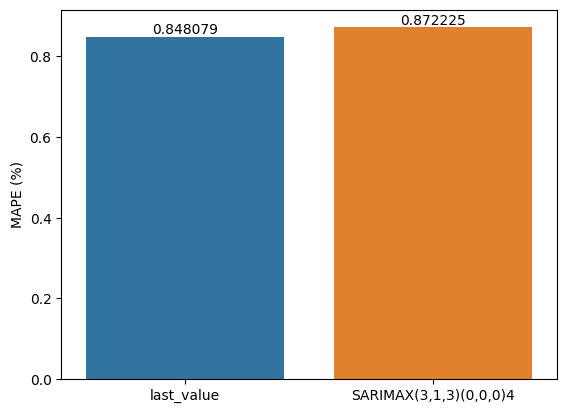

In [ ]:
## Assessing prediction models ##

# Calculating MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

mape_last = mape(test_target, pred_last)
mape_SARIMAX = mape(test_target, pred_sarimax)

# Plot MAPEs
mape_data = {
    'name':['last_value', 'SARIMAX(3,1,3)(0,0,0)4'],
    'mape':[mape_last, mape_SARIMAX]
    }

_, ax = plt.subplots()
sns.barplot(data=mape_data, x='name', y='mape')
ax.bar_label(ax.containers[0])
plt.ylabel('MAPE (%)');

# Intuition:
# SARIMAX(3,1,3)(0,0,0)4 is not the best performing model
# Business context: Since we're predicting real GDP in thousand dollars, difference of 0.02% can
# be significant enough to justifying using/not using the SARIMAX model, even through it is only
# slightly better/worst than baseline.

# Appendix

<Axes: >

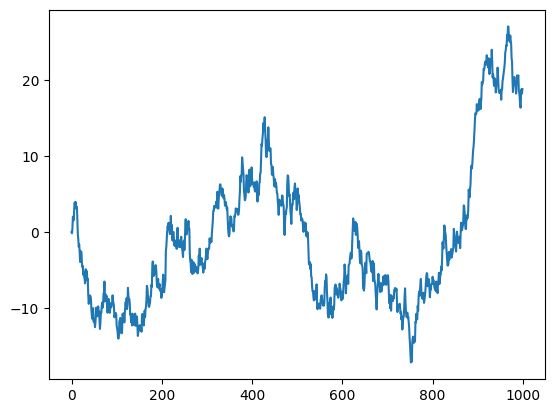

In [ ]:
## Simulate random walk process ##
import numpy as np
import seaborn as sns

np.random.seed(42)

# Simulate standard normal random time series
steps = np.random.normal(0, 1, 1000)
steps[0] = 0
random_walk = np.cumsum(steps)

# Plot random walk
sns.lineplot(random_walk)

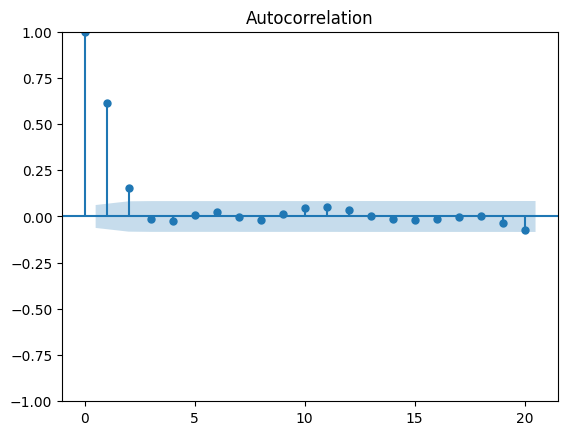

In [ ]:
## Simulate an MA(2) process ##
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

np.random.seed(42)

# Simulating MA(2) process: Y_t = 0.9θ_{t-1} + 0.3θ_{t-2}
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
# ma parameters: [1st autocorrelation coefficient in ACF, coefficients of MA process]

# Plot ACF
plot_acf(MA2_process, lags=20);

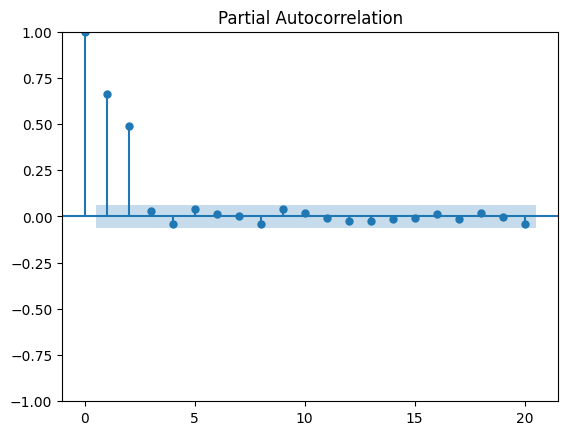

In [ ]:
## Simulate an AR(2) process ##
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

np.random.seed(42)

# Simulating AR(2) process: Y_t = 0.33y_{t-1} + 0.5y_{t-2}
ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
# ar parameters: [1st autocorrelation coefficient in ACF, negative of coefficients of AR process]

# Plot PACF
plot_pacf(AR2_process, lags=20);

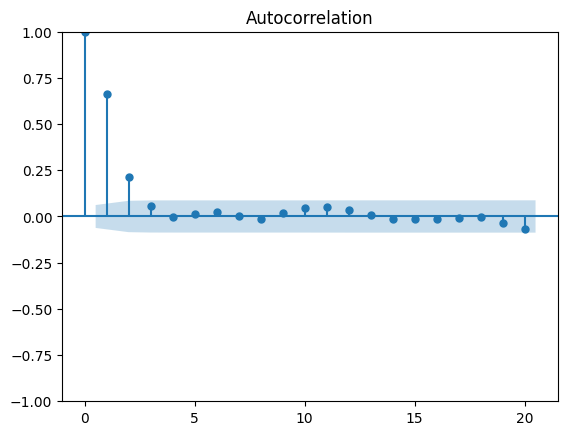

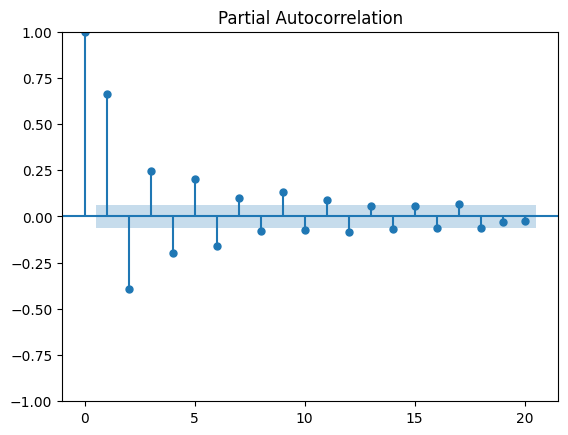

In [ ]:
## Simulate an ARMA(1,1) process ##
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

np.random.seed(42)

# Simulating ARMA(1,1) process: Y_t = 0.33y_{t-1} + 0.9ε_{t-1} + ε_t
ma1 = np.array([1, 0.9])
ar1 = np.array([1, -0.33])
ARMA_1_1_process = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)
# ma parameters: [1st autocorrelation coefficient in ACF, coefficients of MA process]
# ar parameters: [1st autocorrelation coefficient in ACF, negative of coefficients of AR process]

# Plot ACF
plot_acf(ARMA_1_1_process, lags=20)

# Plot PACF
plot_pacf(ARMA_1_1_process, lags=20);

# Intuition: Both ACF and PACF plots display sinusoidal/decaying pattern -> ARMA(p,q) process

In [ ]:
## Function to forecast the next timestep multiple times ##
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def rolling_forecast(df: pd.DataFrame,
                     train_len: int,
                     test_len: int,
                     window: int,
                     method: str) -> list:

    total_len = train_len + test_len

    # As time series increases by window period, new mean is calculated
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = df.iloc[:train_len,].mean()
            pred_mean.extend(mean.to_list() * window)
        return pred_mean

    # As time series increases by window period, new last value is extracted
    elif method == 'last':
        pred_last = []
        for i in range(train_len, total_len, window):
            last_value = df.iloc[i-1,]
            pred_last.extend(last_value.to_list() * window)
        return pred_last

    # As time series increases by window period, new ARMA is calculated
    elif method == 'ARMA':
        pred_arma = []
        for i in range(train_len, total_len, window):
            arma_model = SARIMAX(df.iloc[:i,], order=(2, 0, 2))
            res = arma_model.fit()
            predictions = res.get_prediction(0, i + window -1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_arma.extend(oos_pred)
        return pred_arma

# Forecasting using historical mean, last value, and AR(3)
df_diff = pd.DataFrame(hourly_bandwidth_diff, columns=['bandwidth_diff'])
TRAIN_LEN = len(train)
TEST_LEN = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'mean')
pred_last = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'last')
pred_arma = rolling_forecast(df_diff, TRAIN_LEN, TEST_LEN, WINDOW, 'ARMA')


In [ ]:
## How to inverse-difference time series ##
import pandas as pd
import numpy as np

x = pd.Series([34,10,5,11,24,37,49,59,80,101])
print('Actual values:', x.to_list())

# Splitting differenced values into train and test
# Note: 0 to 2 are train set, 3 to 9 are test set (*diff values*)
y = np.diff(x)
train = y[:3]
test = y[3:]
print('Differenced values:', y)
print('Differenced values for test:', test)

# Inverse-differencing test/predicted values
print('To use index 3 or -7 of actual values for inverse-diff:', x.iloc[-7])
z1 = np.cumsum(np.insert(test, 0,  x.iloc[-7]))         # Apply cumsum at once, ending up with a 'redundant' value
z2 = x.iloc[-7] + np.cumsum(test)                       # Apply cumsum 'effectively'
print('Result of 1st method:', z1)
print('Result of 2nd method:', z2)

# Conclusion: y0 = actual value [index of 1st test value within all diff values] = actual value [-1 - len of test set]

Actual values: [34, 10, 5, 11, 24, 37, 49, 59, 80, 101]
Differenced values: [-24  -5   6  13  13  12  10  21  21]
Differenced values for test: [13 13 12 10 21 21]
To use index 3 or -7 of actual values for inverse-diff: 11
Result of 1st method: [ 11  24  37  49  59  80 101]
Result of 2nd method: [ 24  37  49  59  80 101]


In [ ]:
# ## How to inverse-difference time series - splitting data before differencing? ##
# import pandas as pd
# import numpy as np

# x = pd.DataFrame([34,10,5,11,24,37,49,59,80,101])
# x_train = x.iloc[:3,0]
# x_test = x.iloc[3:,0]
# print('Actual value:', x_test.to_list())

# y = np.diff(x_test)

# z1 = np.cumsum(np.insert(y, 0,  x_test.iloc[0]))        # Apply cumsum at once, ending up with a 'redundant' value
# z2 = x_test.iloc[0] + np.cumsum(y)                      # Apply cumsum 'effectively'
# z3 = np.cumsum(np.insert(y, 0,  x_train.iloc[-1]))
# print('Using first value of test:', z1)
# print('Using first value of test:', z2)
# print('Using last value of train:', z3)

# # Conclusion: y0 = 1st value of actual data that underwent differencing.

Everything here is based on textbook:
* Time Series Forecasting in Python - Marco Peixeiro
